## **Theme**

---
Data For The Future


### **Problem Statement**


---


Analyse pertinent data trends concerning the biodiversity sector to improve the sector’s efficiency and abilities.

## **Research Question**


---


Study population trends of endangered species and its correlation to potential factors(temperature) leading to the dwindling population

# **Scope for Dataset**


---


**Time Range:** 2000 - 2020

**Continent:** Asia

**Dataset:**

*   Asia Land Temperature (https://berkeleyearth.org/temperature-region/asia)
*   Occurence of Species (https://www.gbif.org/occurrence/search?occurrence_status=present&q=) (*Documentation for GBIF* - https://docs.gbif.org/course-data-use/en/basis-of-record.html)



# **Python Libraries Used**

---



In [ ]:
#Dataframe Creation and Data Cleaning
import pandas as pd

#Visualisation Graph Creation
import seaborn as sns
import matplotlib.pyplot as plt

# **2024 Critically Endangered Animal in Asia**


---

**Filter Used:**

*   Continent: ASIA
*   Year: 2024
*   IUCN Global Red List Category: Critically Endangered
*   Basis of Record: Living Specimen, Human Observation, Machine Observation, Observation


**Results:**

In [2]:
#Species in Asia which are tagged as "Critically Endangered" in 2024
CE_2024_df = pd.read_csv('/content/2024_CriticallyEndangered_Asia.csv', delimiter='\t')

unique_species = CE_2024_df['scientificName'].unique()

num_species = len(unique_species)

print("\033[1mThere are ",num_species," species which are tagged as \"Critically Endangered\"\033[0m\n")
for name in unique_species:
    print(name)

There are  233  species which are tagged as "Critically Endangered"

Trachypithecus leucocephalus Tan, 1957
Gavialis gangeticus (Gmelin, 1789)
Indotestudo elongata (Blyth, 1854)
Mauremys sinensis (Gray, 1834)
Micrixalus kottigeharensis (Rao, 1937)
Pygathrix nigripes (A.Milne-Edwards, 1871)
Macrocephalon maleo S.Müller, 1846
Leucopsar rothschildi Stresemann, 1912
Pseudibis davisoni (Hume, 1875)
Emberiza aureola Pallas, 1773
Pongo pygmaeus pygmaeus
Raorchestes munnarensis (Biju & Bossuyt, 2009)
Libellula angelina Selys, 1883
Alligator sinensis Fauvel, 1879
Manis pentadactyla Linnaeus, 1758
Iris atropurpurea Baker
Cophotis dumbara Samarawickrama, Ranawana, Rajapaksha, Ananjeva, Orlov, Ranasinghe & Samarawickrama, 2006
Carpinus putoensis W.C.Cheng
Fraxinus pennsylvanica Marshall
Protosticta rozendalorum van Tol, 2000
Eretmochelys imbricata (Linnaeus, 1766)
Pongo abelii Lesson, 1827
Troglophilus alanyaensis Taylan, Di Russo, Cobolli & Rampini, 2012
Rhinoplax vigil (Pennant, 1781)
Caridina d

# **Species Occurrences from 2000 to 2020 in Asia (no trend due to high amount of missing data and lack of observations)**

---



In [3]:
#A function to create a dataframe for each year from 2000 to 2020, showing the occurrences of different species for each year.
def get_asia_species_data(year: int):

    file_path = f'/content/{year}_ASIA.csv'
    asia_df = pd.read_csv(file_path, delimiter='\t')

    # Remove unnecessary columns
    asia_df = asia_df.drop(["taxonKey", "acceptedTaxonKey", "acceptedScientificName", "taxonomicStatus",
                             "kingdomKey", "phylumKey", "classKey", "orderKey", "familyKey", "speciesKey", "genusKey"], axis=1)

    # Filter for Species which are tagged "Critically Endangered" in 2024 in Asia
    asia_df = asia_df[asia_df['scientificName'].isin(unique_species)]

    # Add the year column
    asia_df['year'] = year

    return asia_df

In [4]:
#Dataframe for 2000 to 2020 in Asia
asia_2000_df = get_asia_species_data(2000)
asia_2001_df = get_asia_species_data(2001)
asia_2002_df = get_asia_species_data(2002)
asia_2003_df = get_asia_species_data(2003)
asia_2004_df = get_asia_species_data(2004)
asia_2005_df = get_asia_species_data(2005)
asia_2006_df = get_asia_species_data(2006)
asia_2007_df = get_asia_species_data(2007)
asia_2008_df = get_asia_species_data(2008)
asia_2009_df = get_asia_species_data(2009)
asia_2010_df = get_asia_species_data(2010)
asia_2011_df = get_asia_species_data(2011)
asia_2012_df = get_asia_species_data(2012)
asia_2013_df = get_asia_species_data(2013)
asia_2014_df = get_asia_species_data(2014)
asia_2015_df = get_asia_species_data(2015)
asia_2016_df = get_asia_species_data(2016)
asia_2017_df = get_asia_species_data(2017)
asia_2018_df = get_asia_species_data(2018)
asia_2019_df = get_asia_species_data(2019)
asia_2020_df = get_asia_species_data(2020)

<ipython-input-3-630217ec05bb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_df['year'] = year


In [5]:
#Combining the dataframe for each year
dfs = [
    asia_2000_df, asia_2001_df, asia_2002_df, asia_2003_df, asia_2004_df,
    asia_2005_df, asia_2006_df, asia_2007_df, asia_2008_df, asia_2009_df,
    asia_2010_df, asia_2011_df, asia_2012_df, asia_2013_df, asia_2014_df,
    asia_2015_df, asia_2016_df, asia_2017_df, asia_2018_df, asia_2019_df, asia_2020_df
]

combined_df = pd.concat(dfs)

combined_df = combined_df.set_index('scientificName')

pivot_df = combined_df.pivot(columns='year', values='numberOfOccurrences')

combined_df=combined_df.drop(["numberOfOccurrences","year"],axis=1)

combined_df = combined_df.loc[~combined_df.index.duplicated(keep='first')]

final_df = combined_df.join(pivot_df, how='inner')

final_df.replace('nan_nan', 'missing', inplace=True)


There are  189  rows.


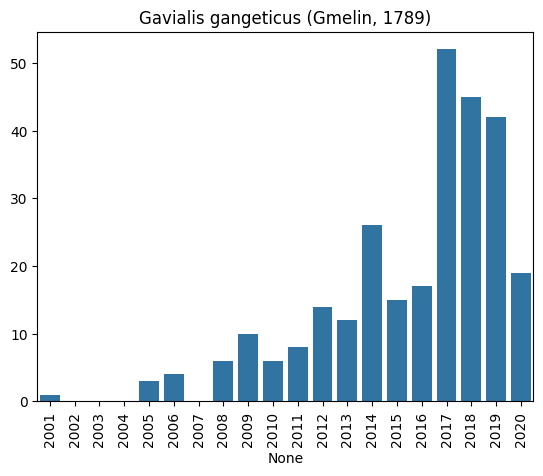

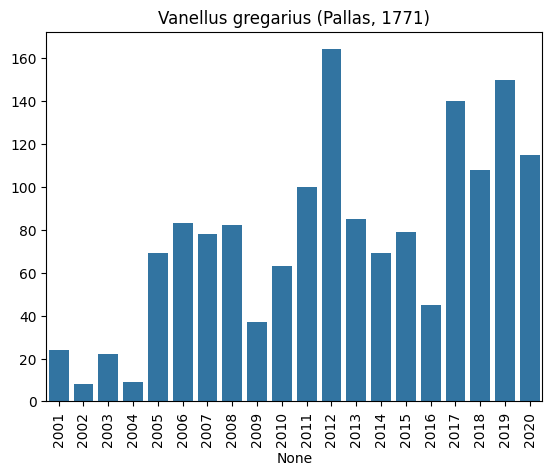

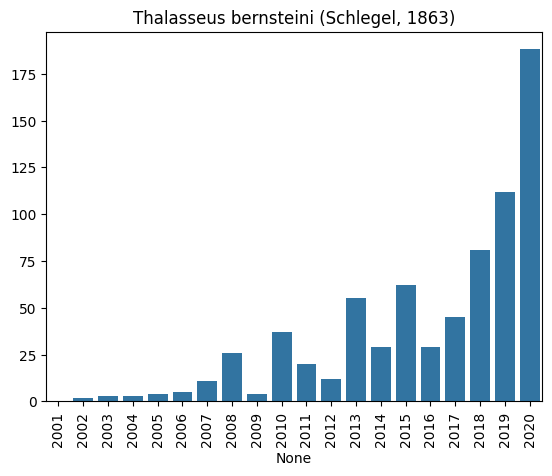

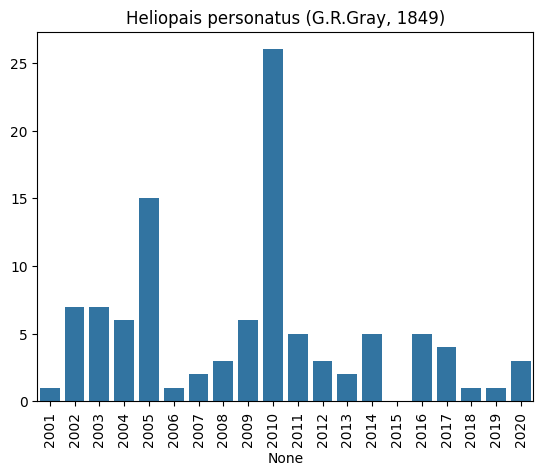

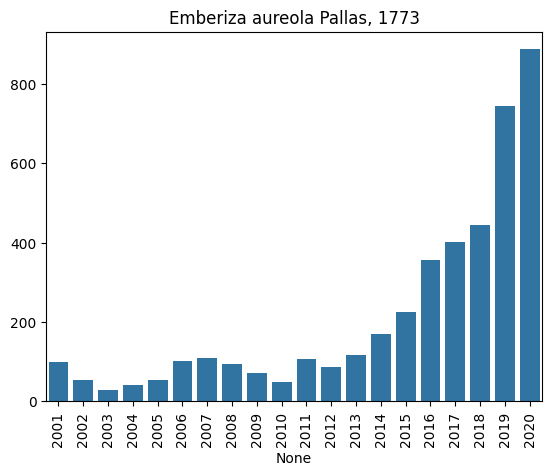

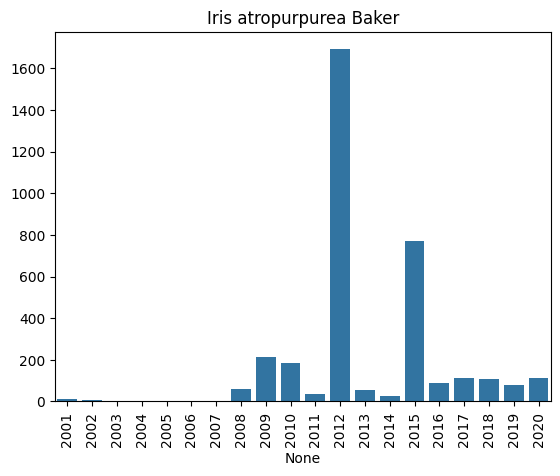

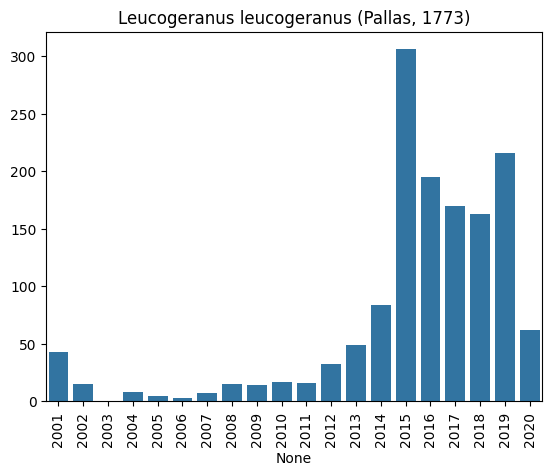

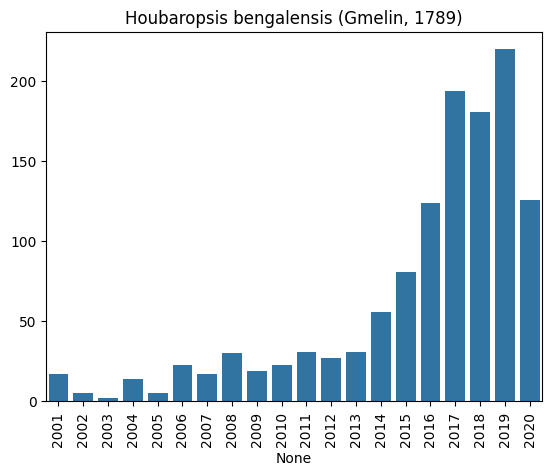

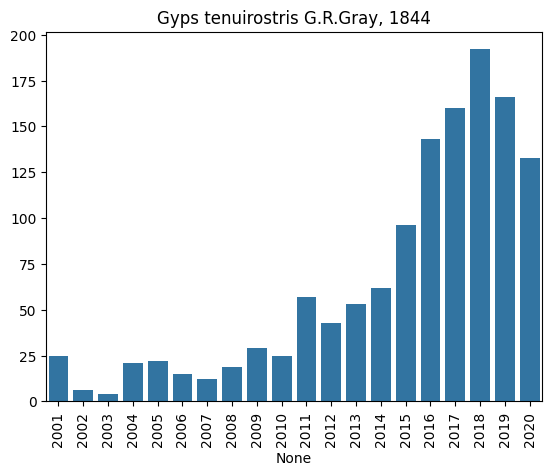

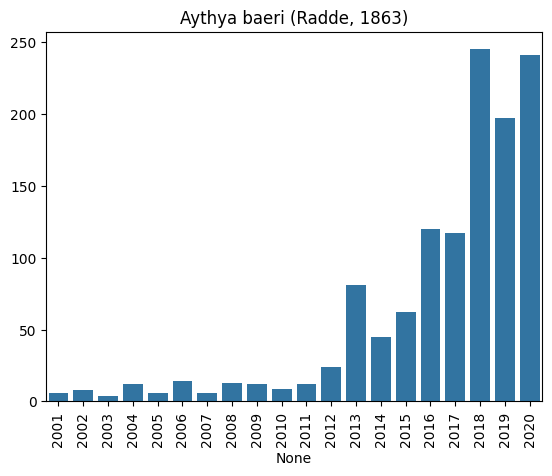

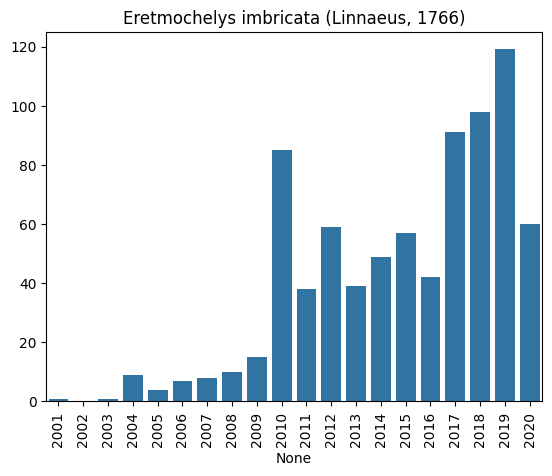

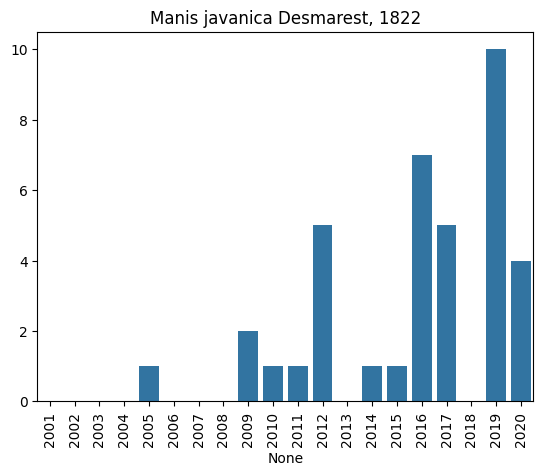

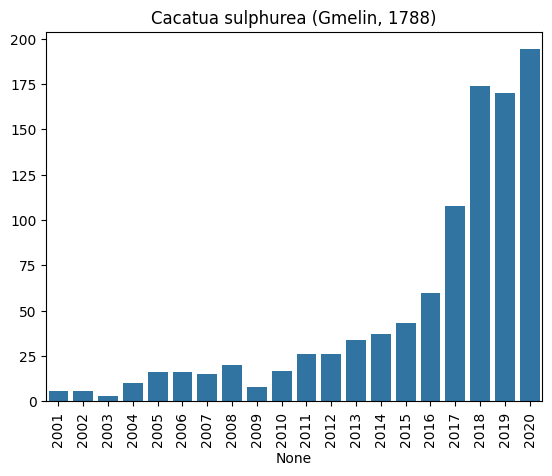

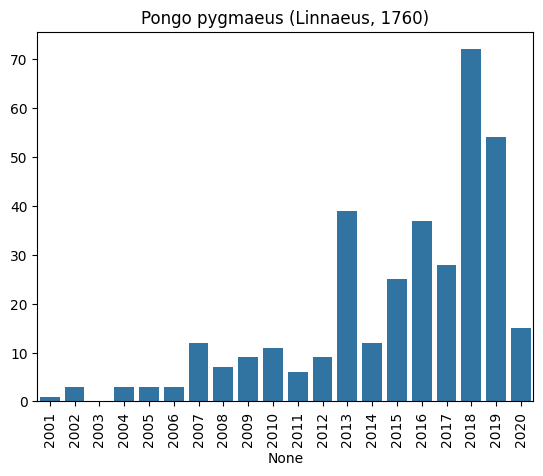

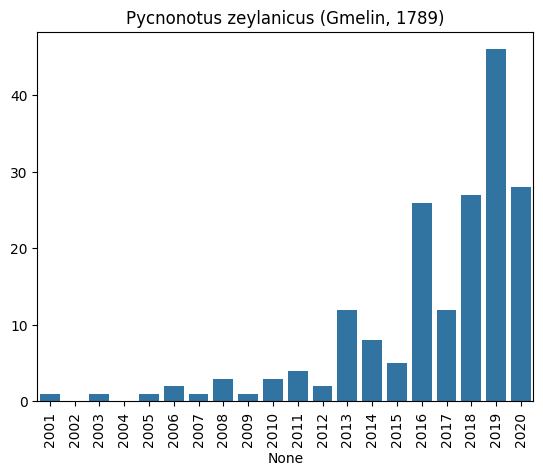

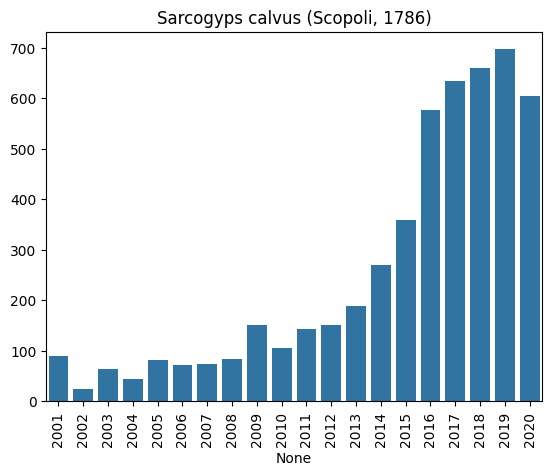

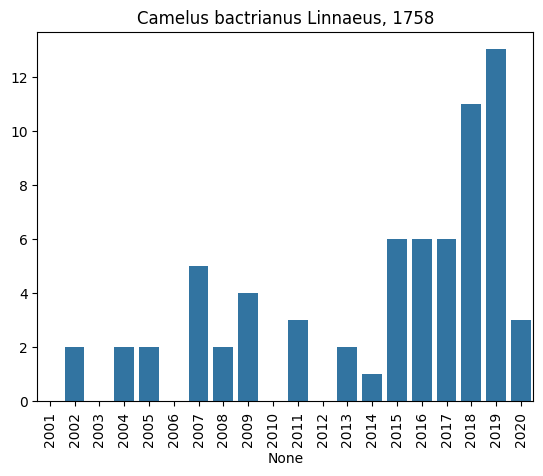

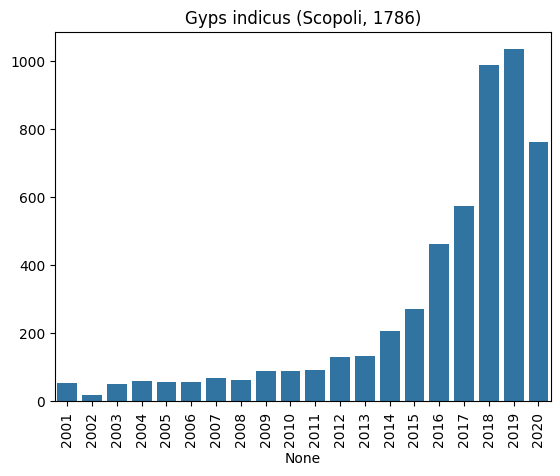

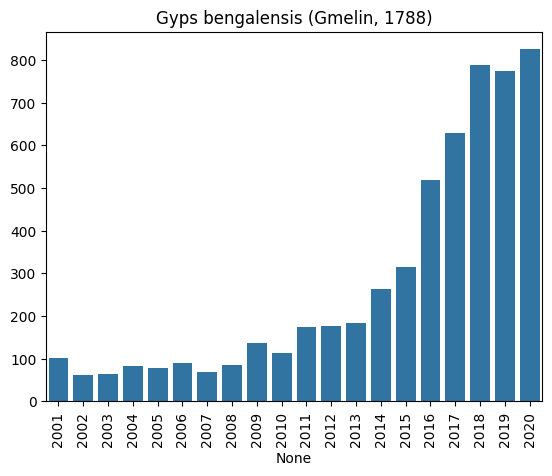

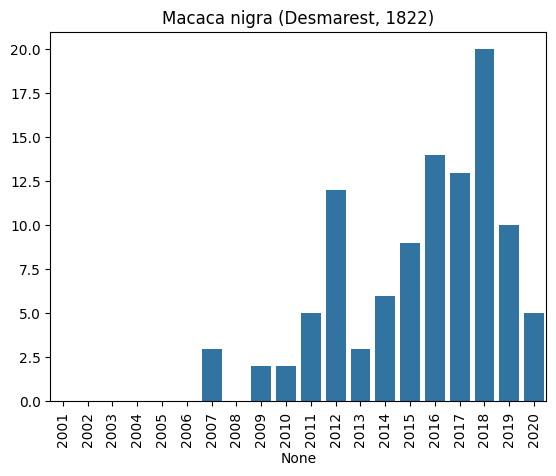

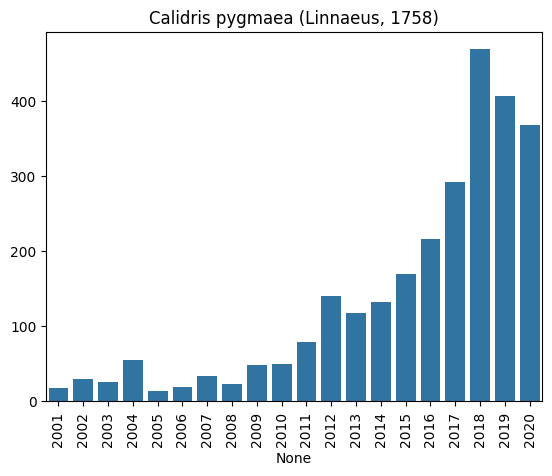

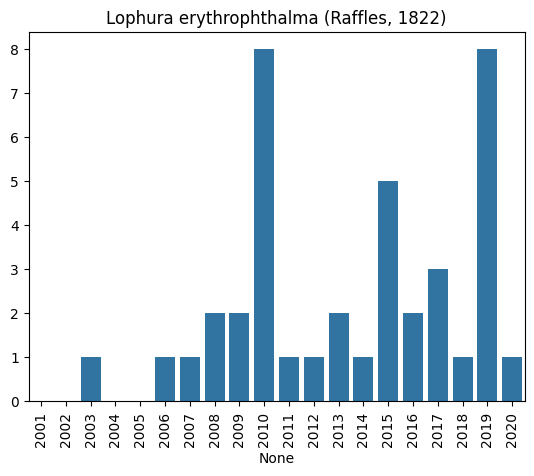

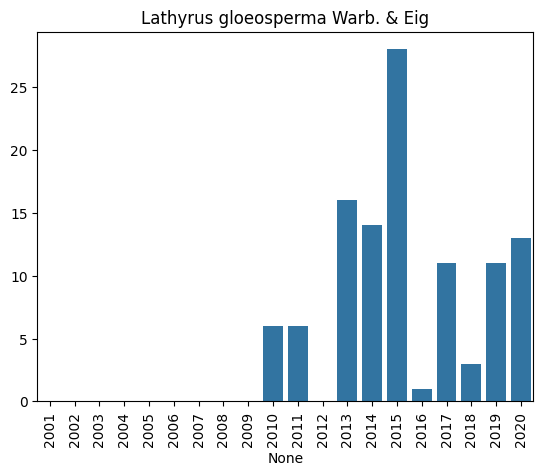

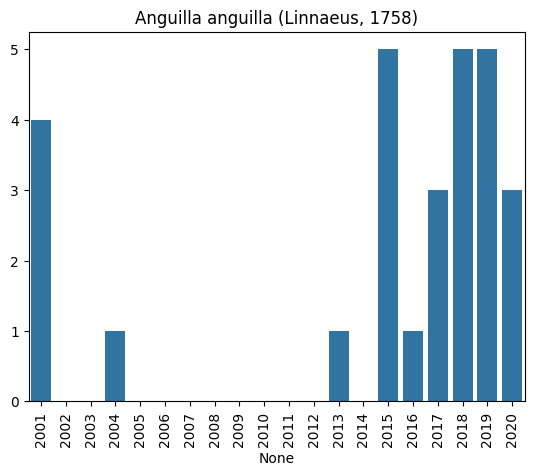

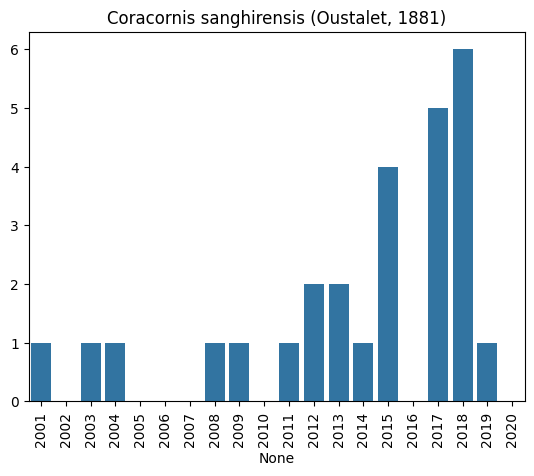

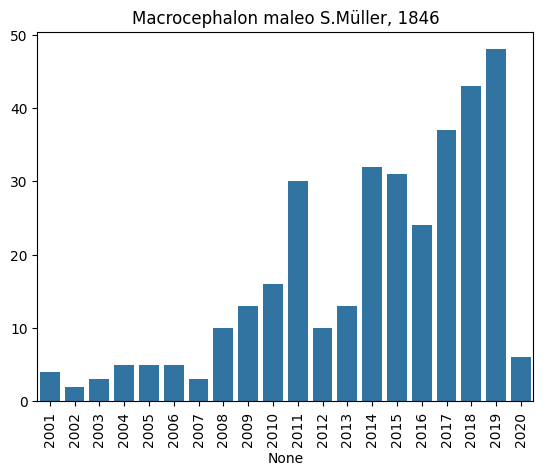

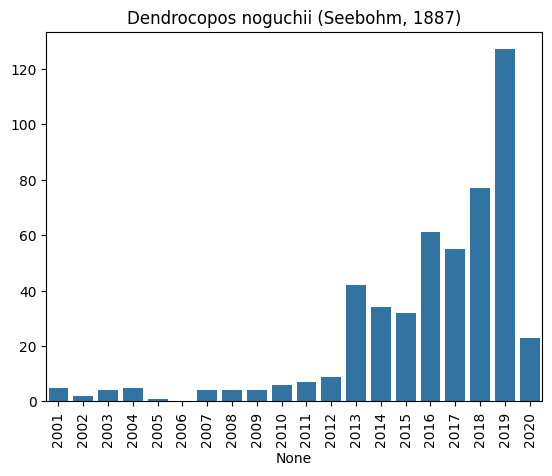

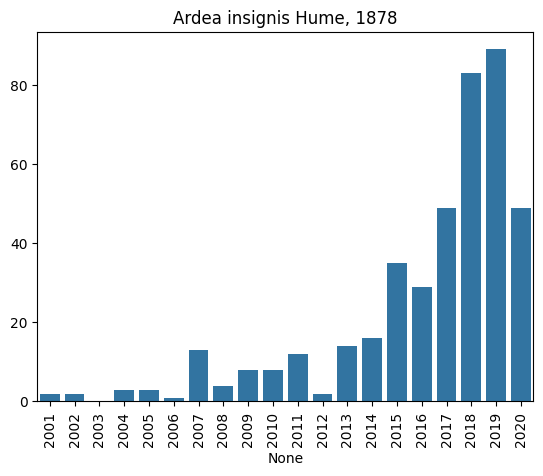

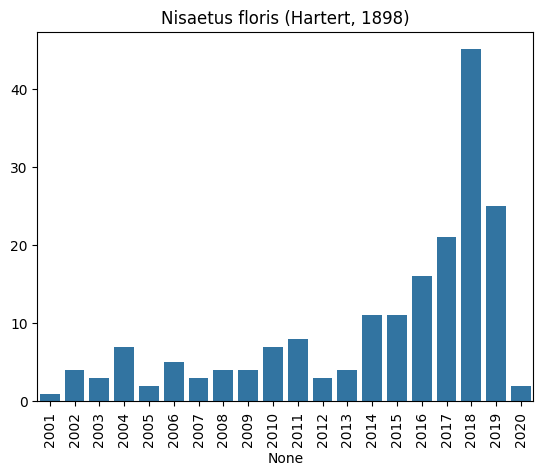

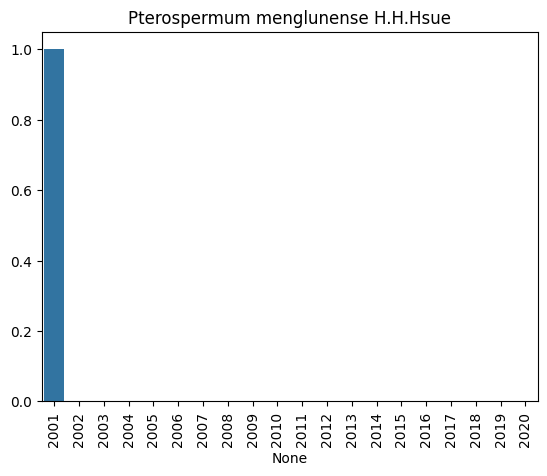

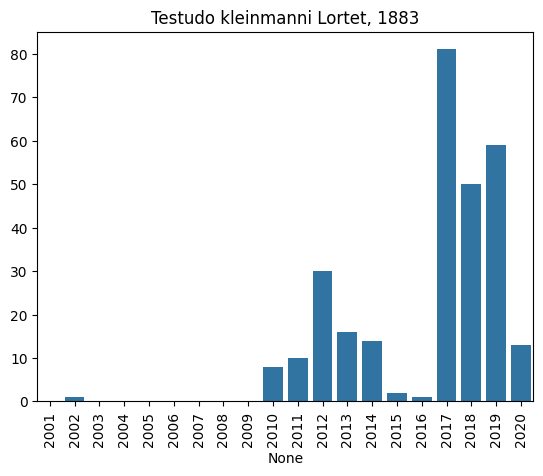

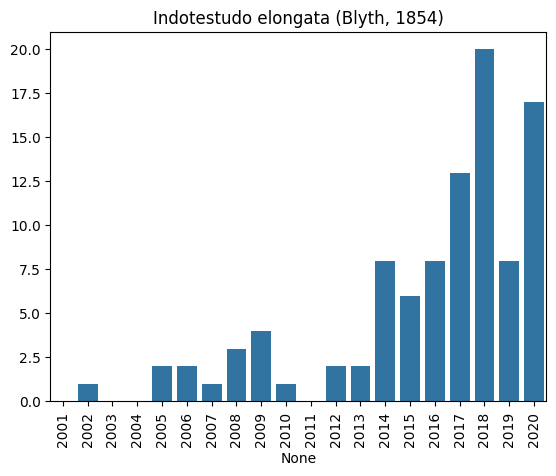

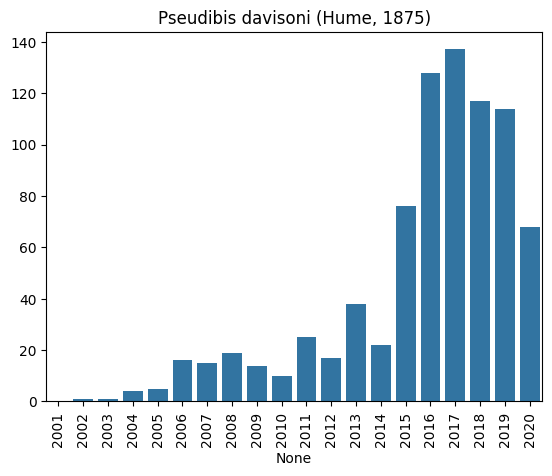

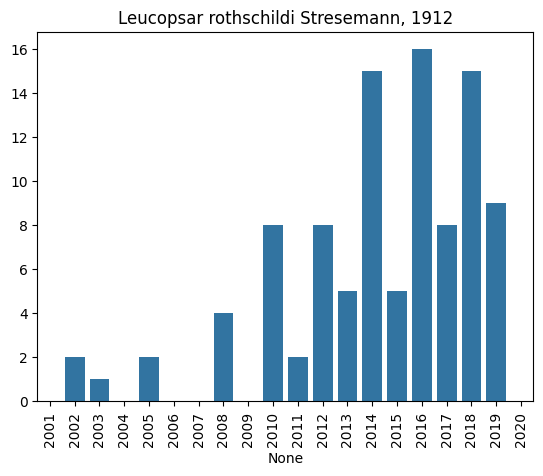

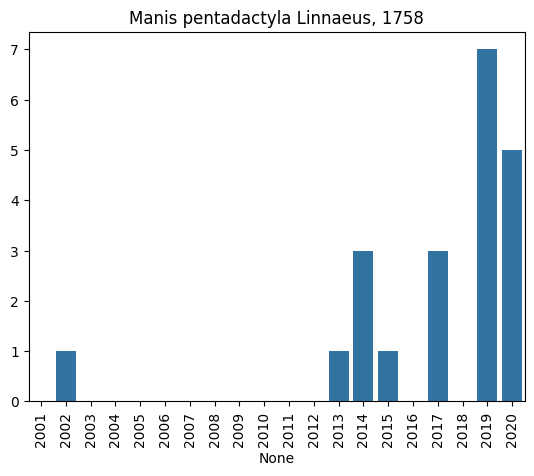

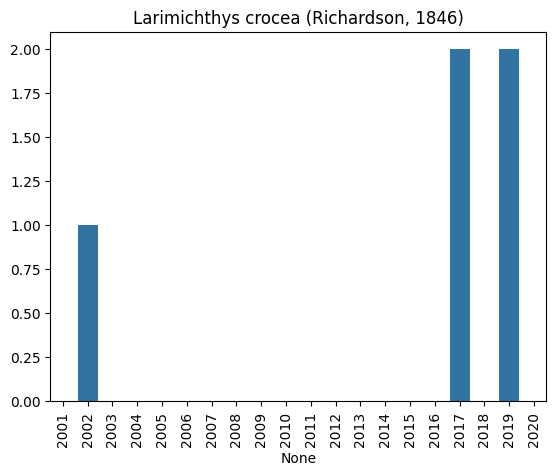

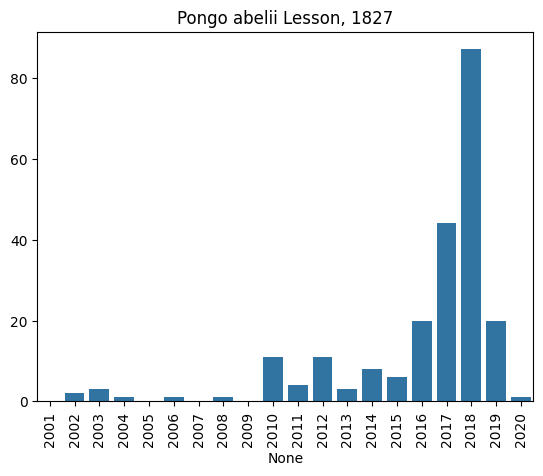

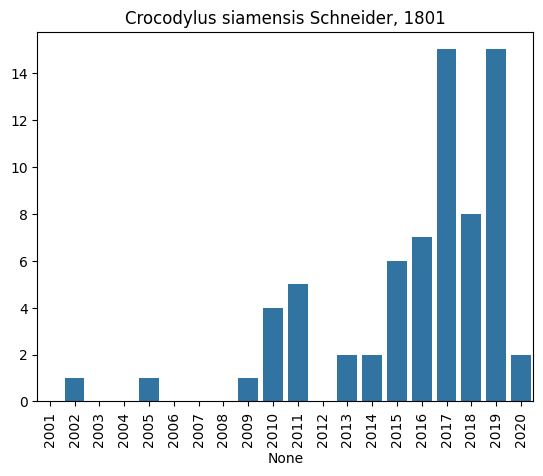

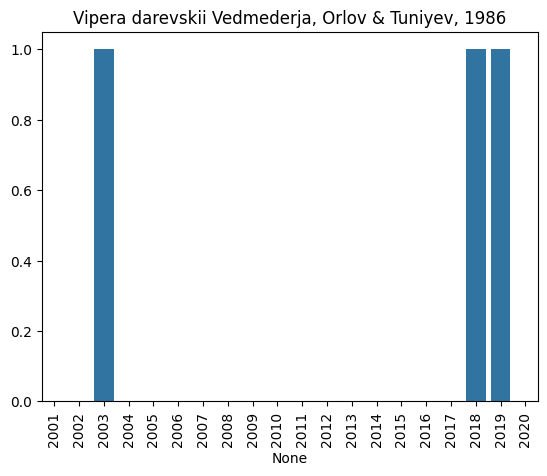

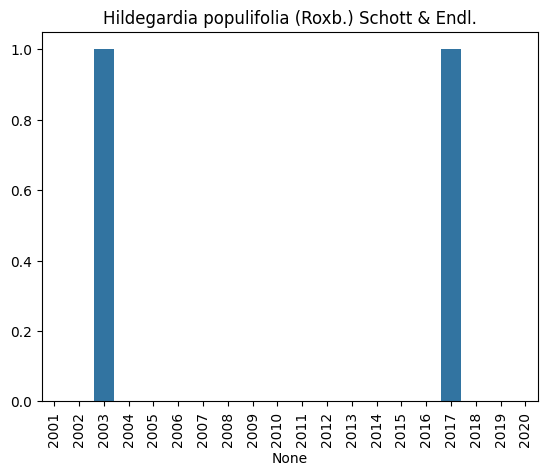

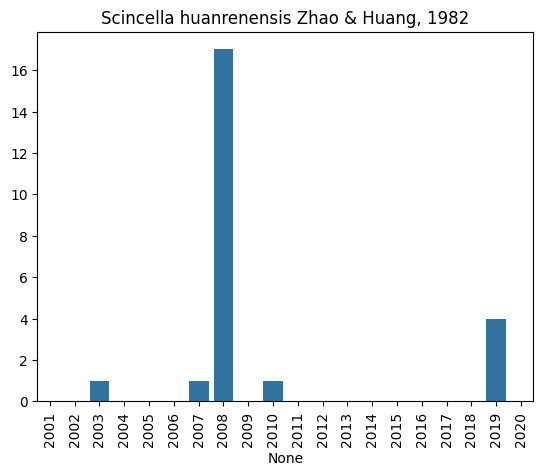

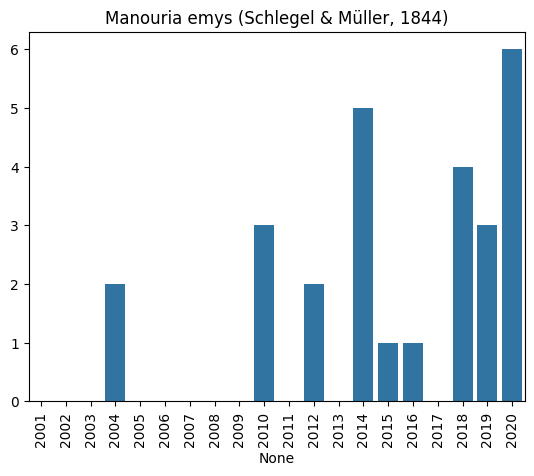

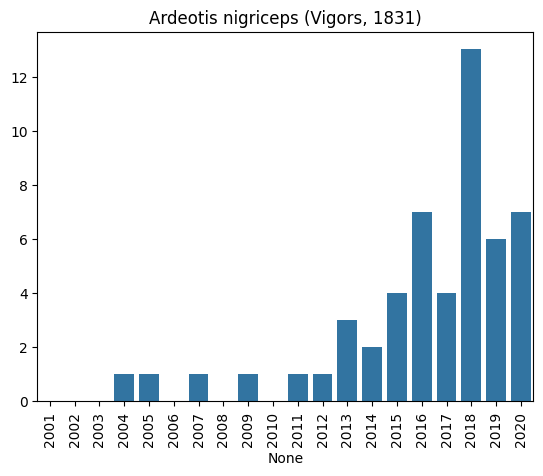

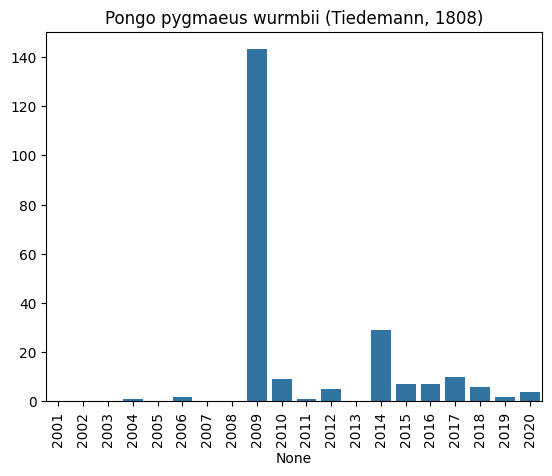

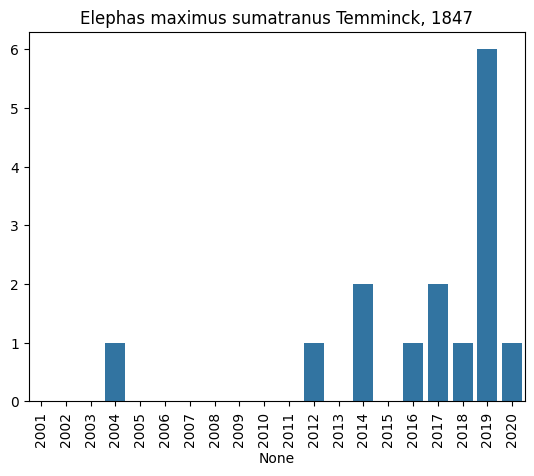

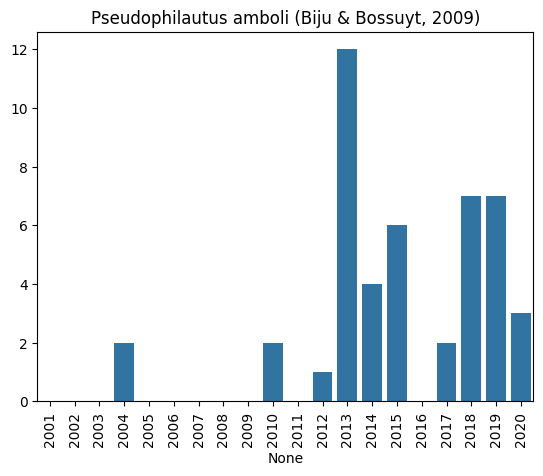

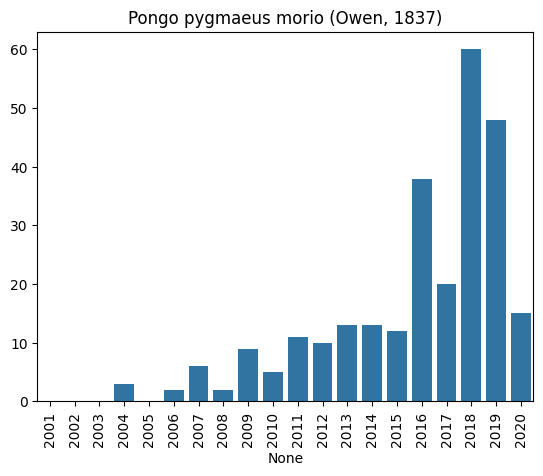

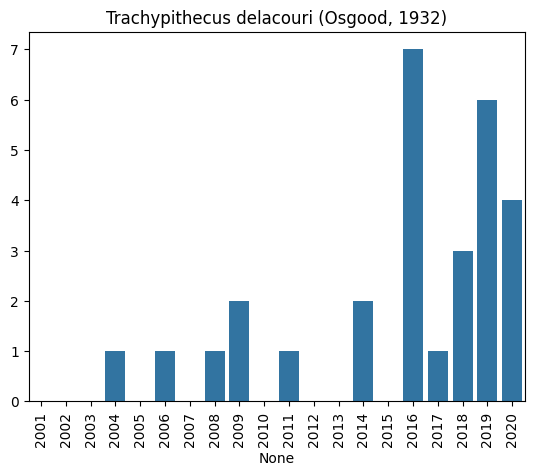

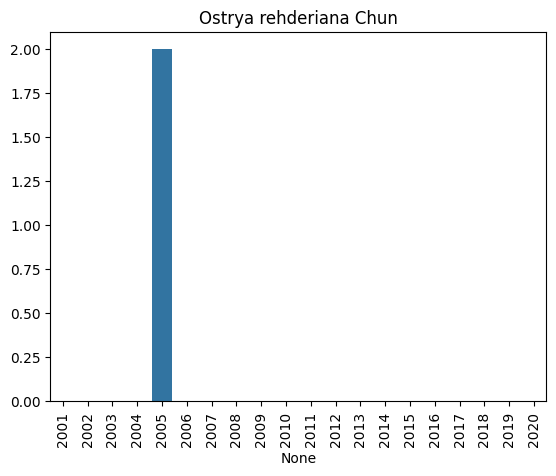

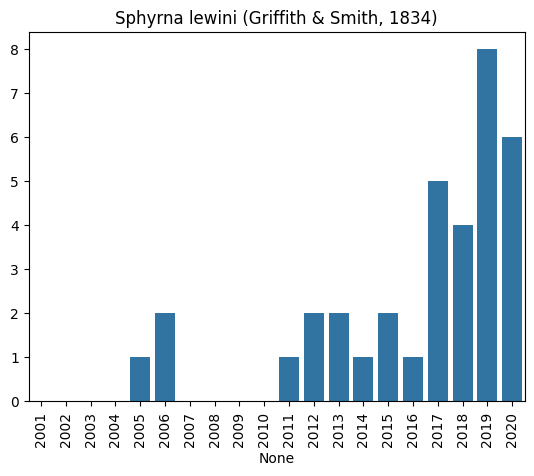

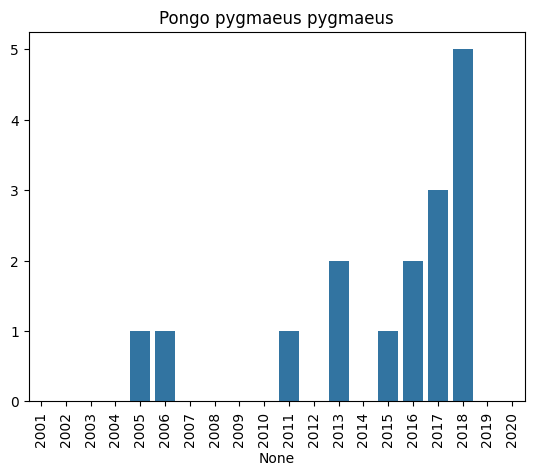

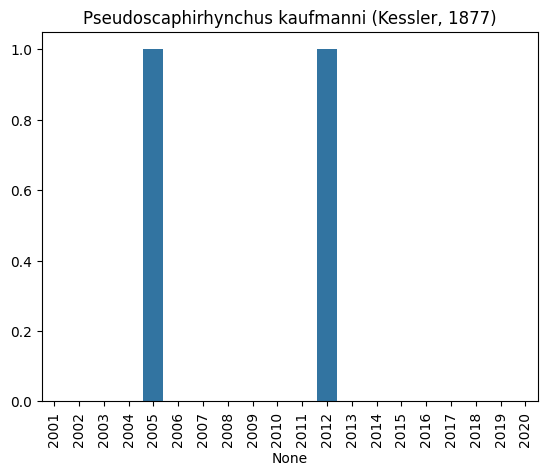

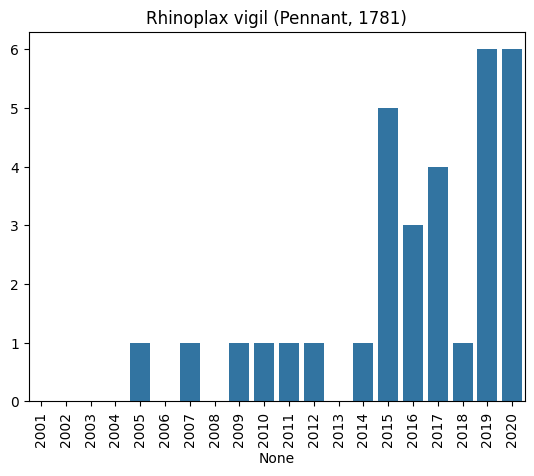

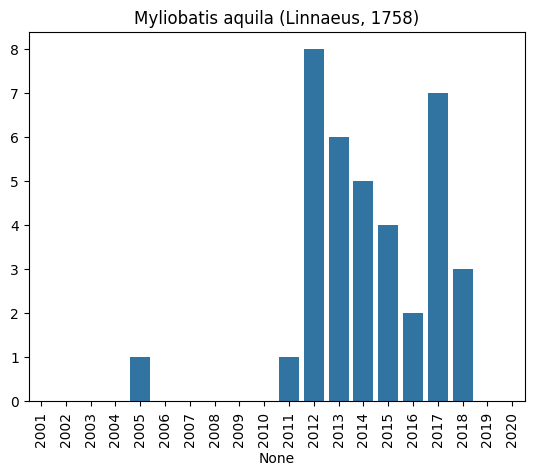

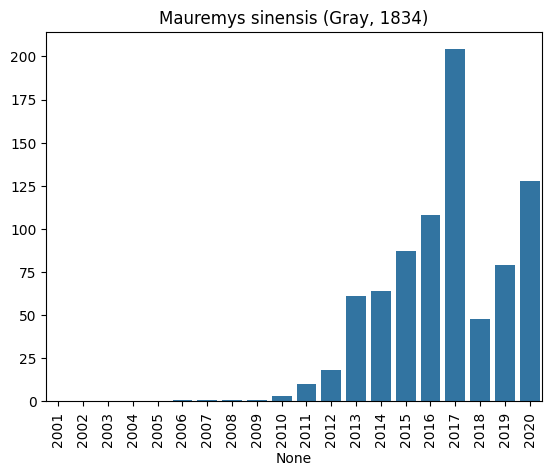

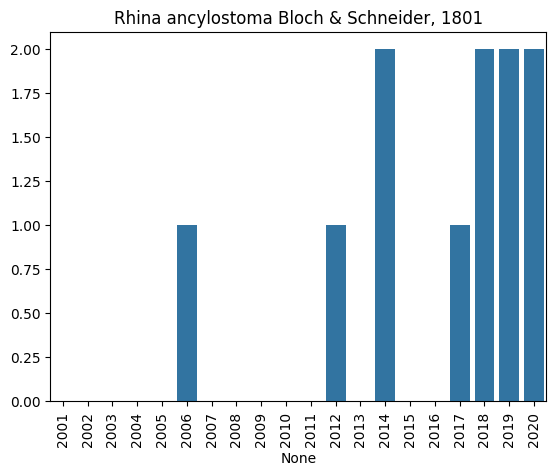

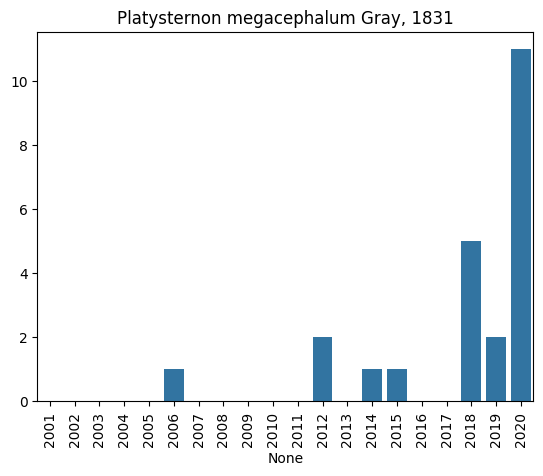

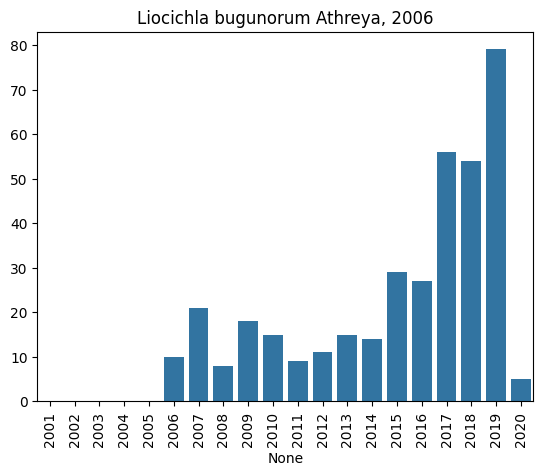

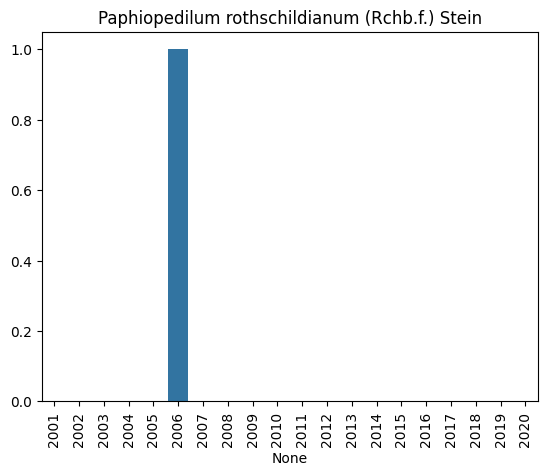

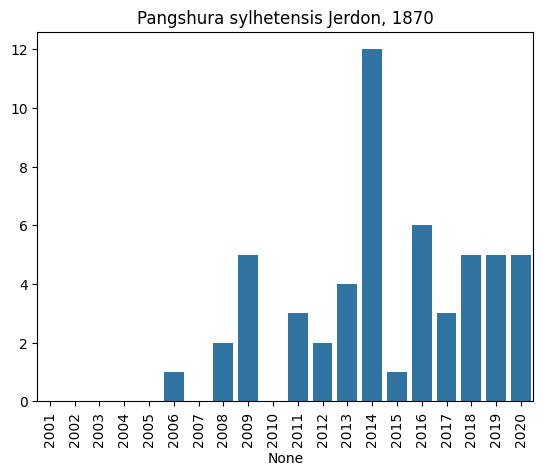

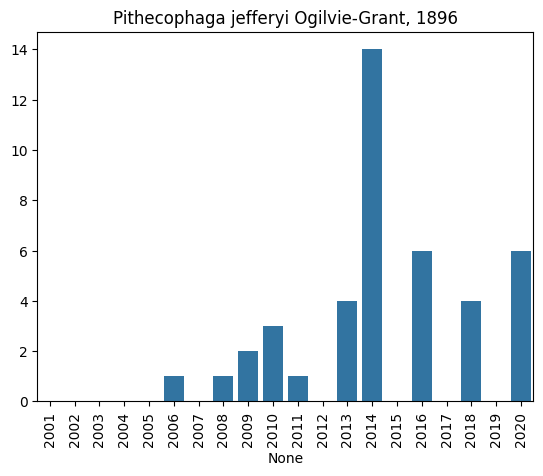

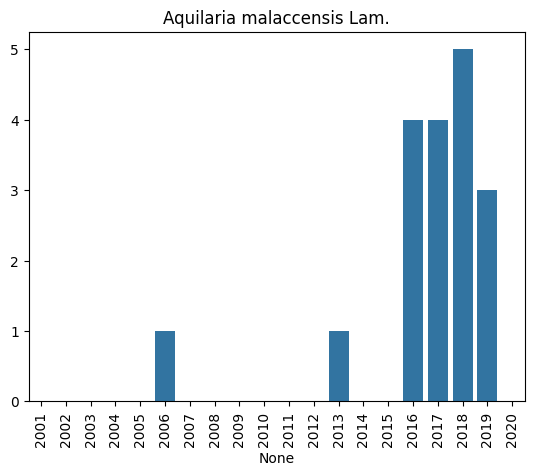

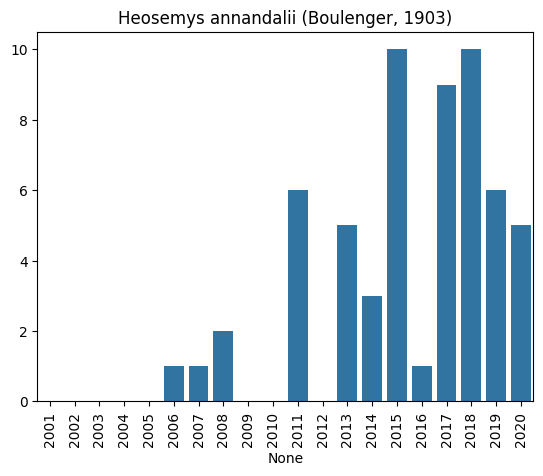

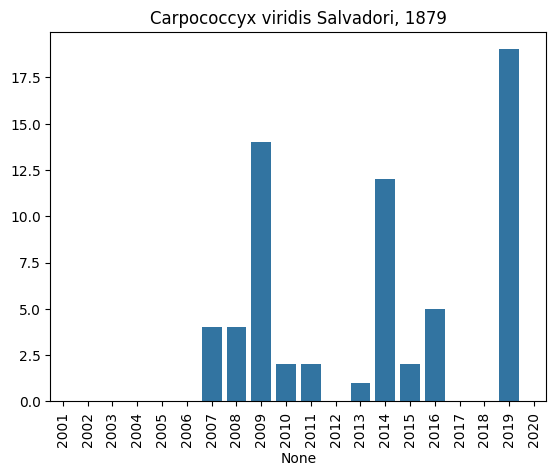

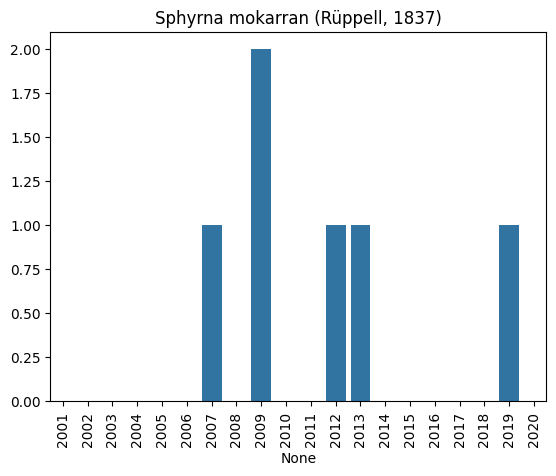

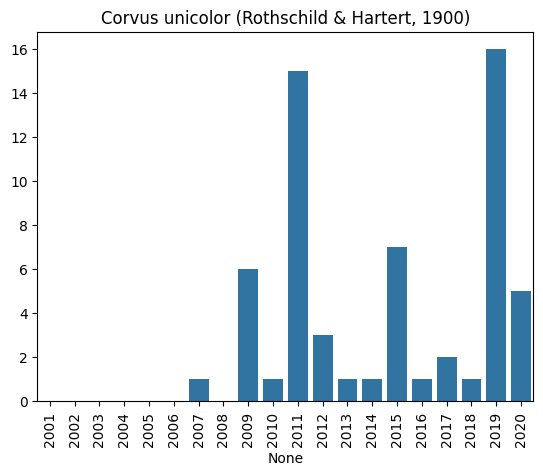

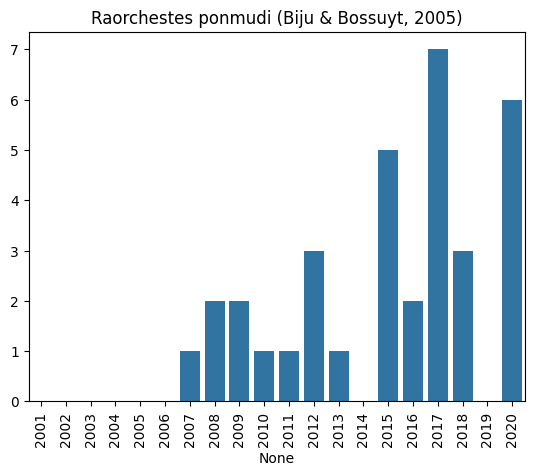

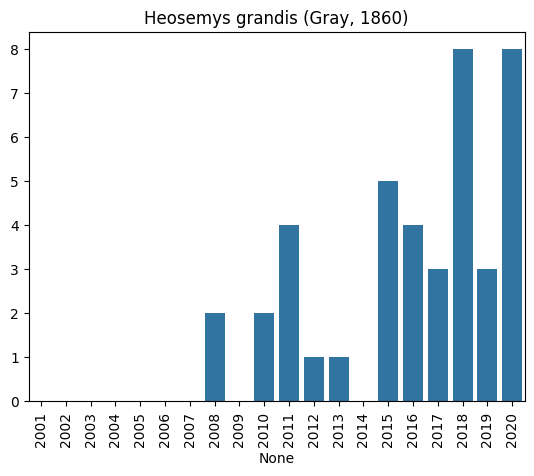

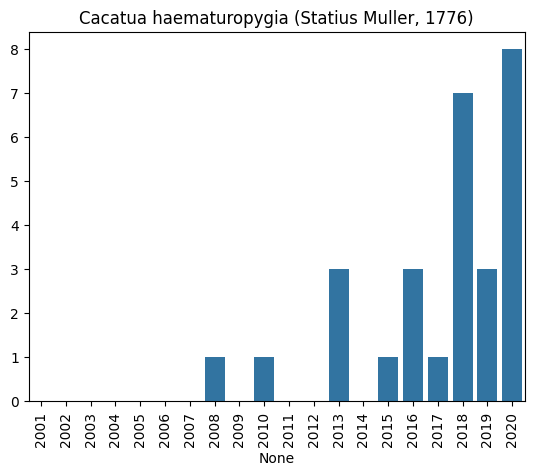

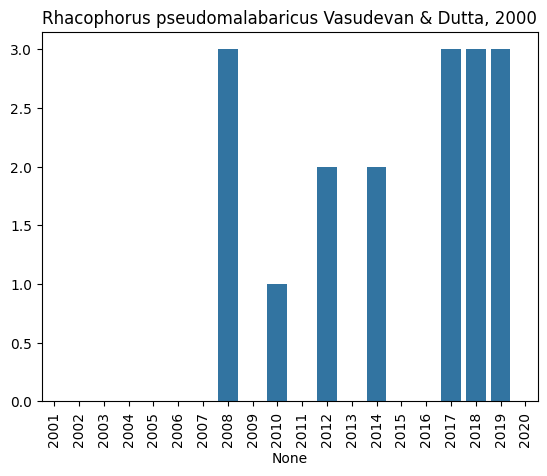

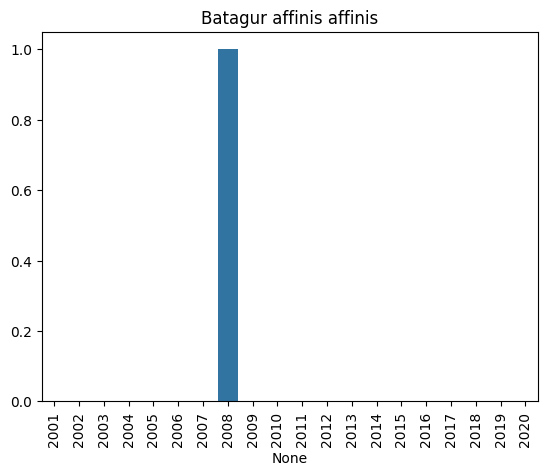

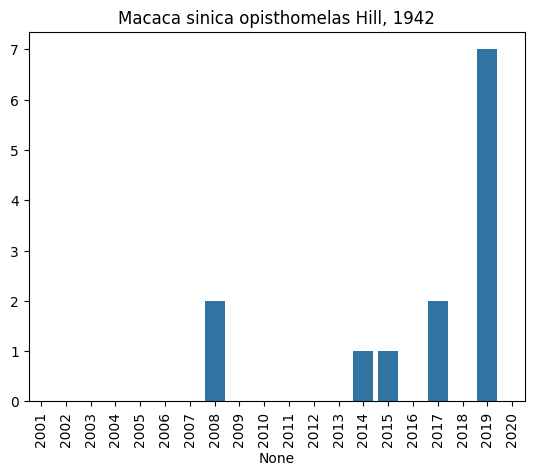

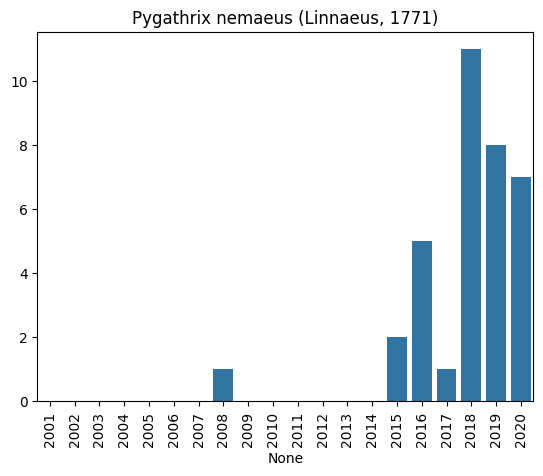

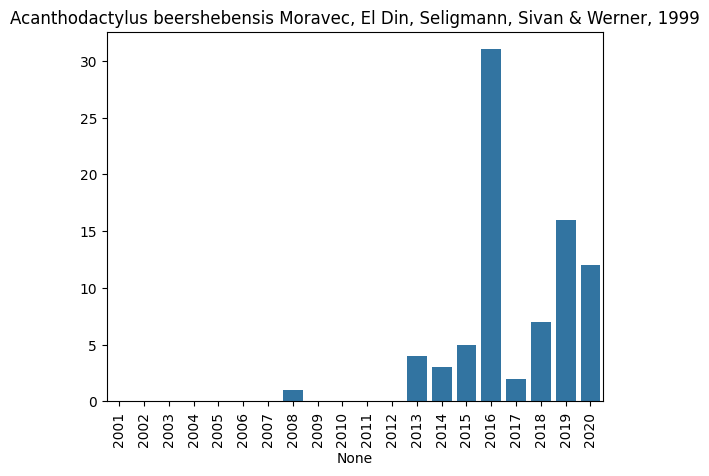

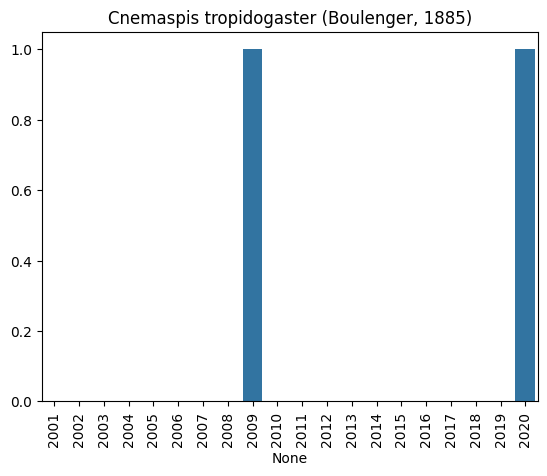

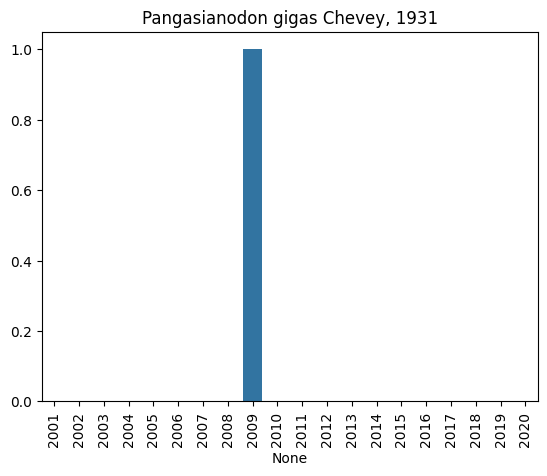

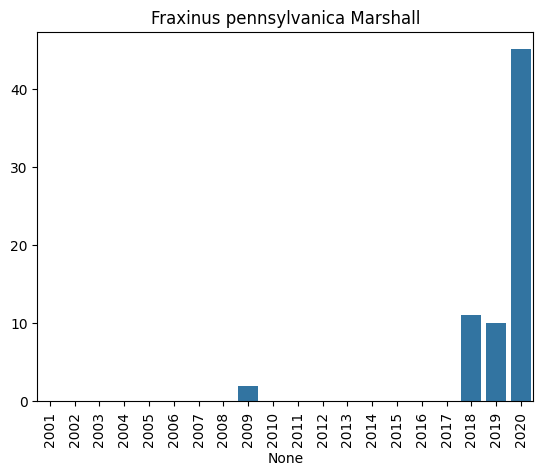

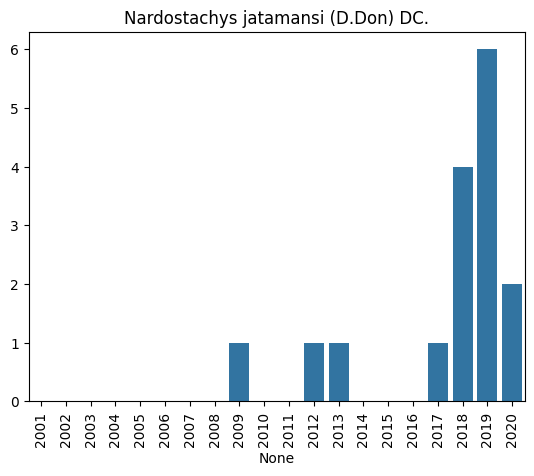

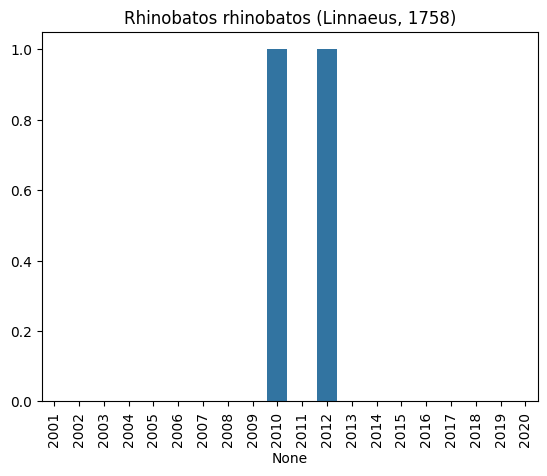

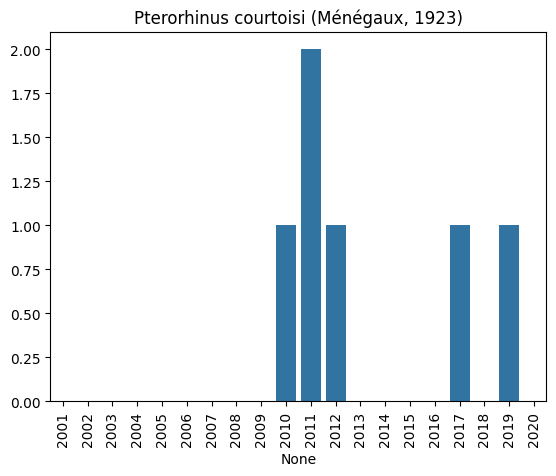

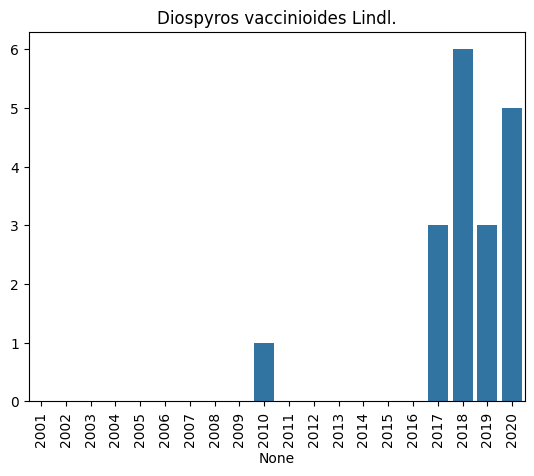

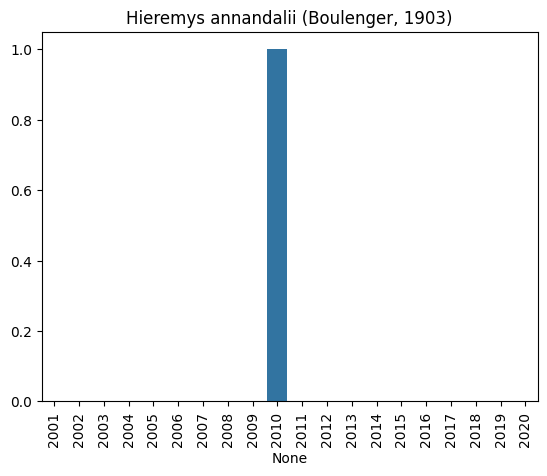

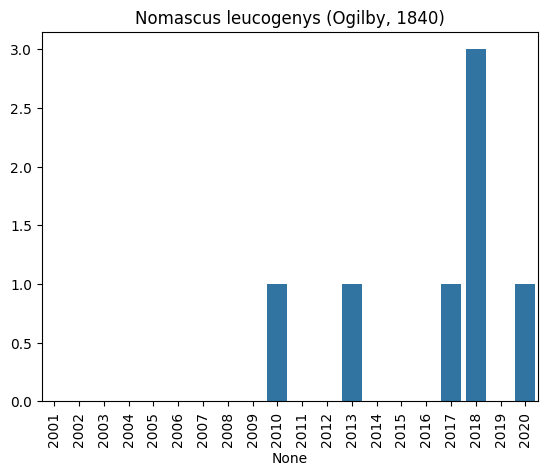

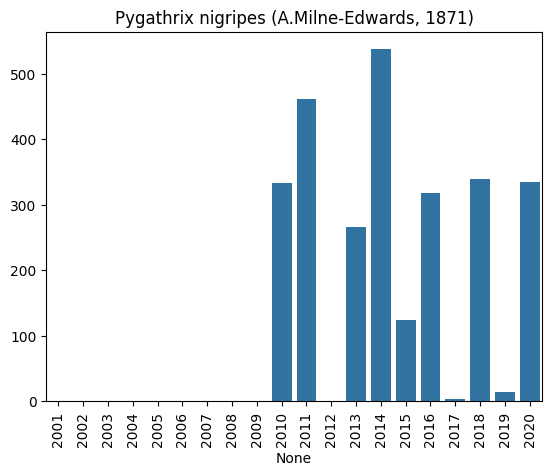

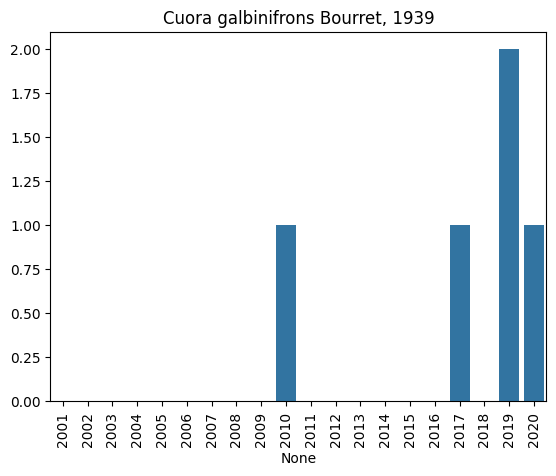

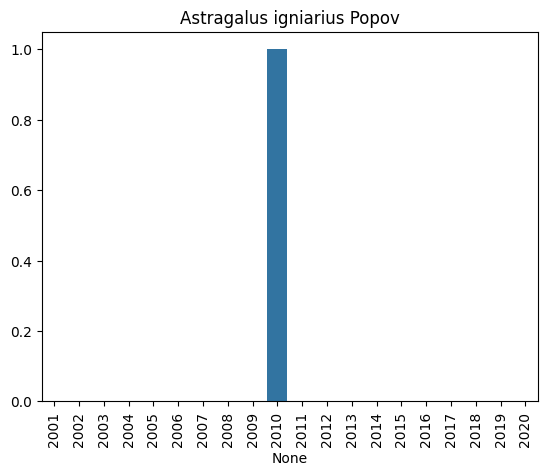

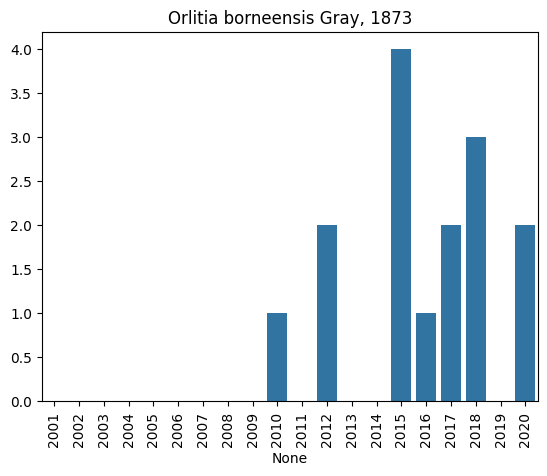

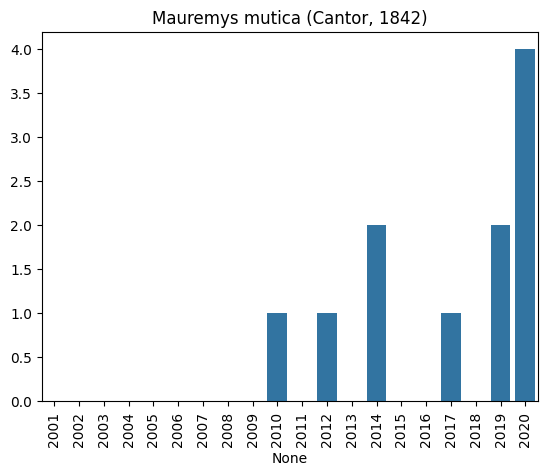

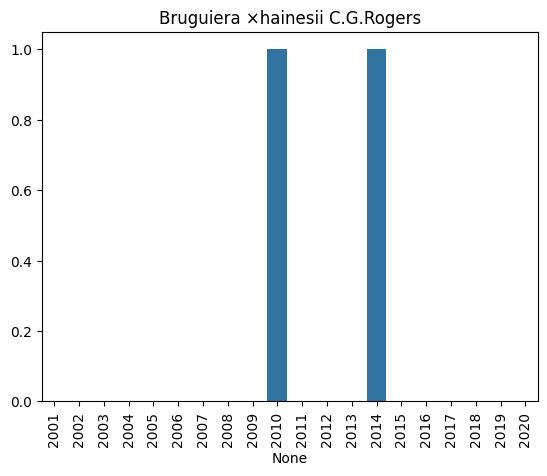

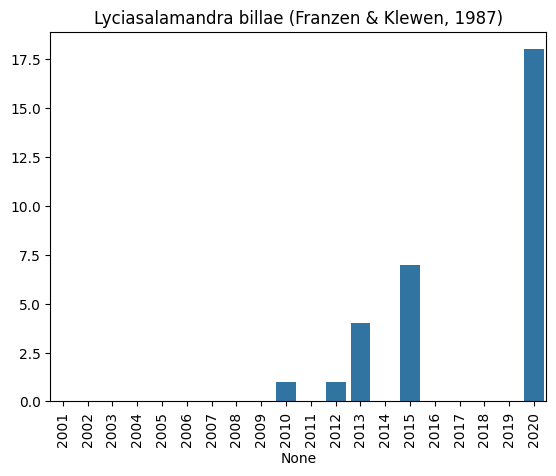

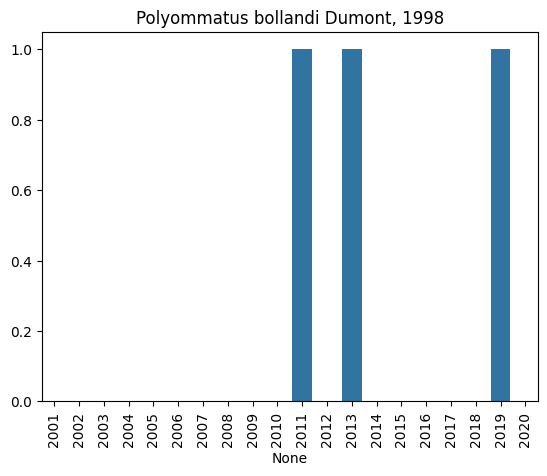

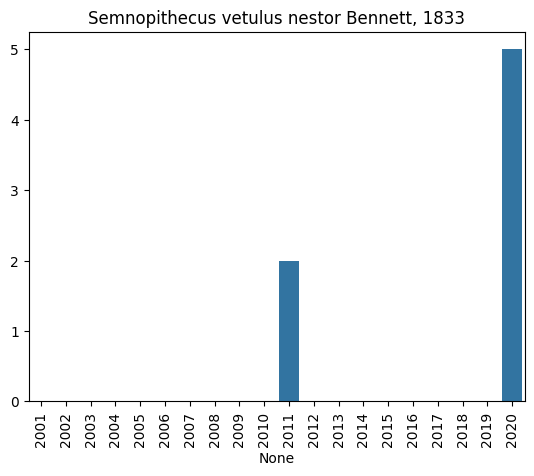

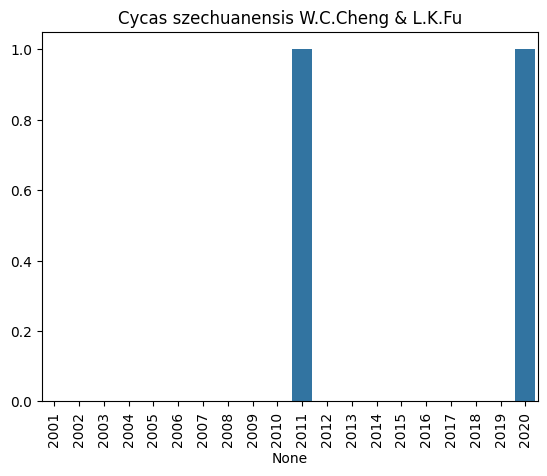

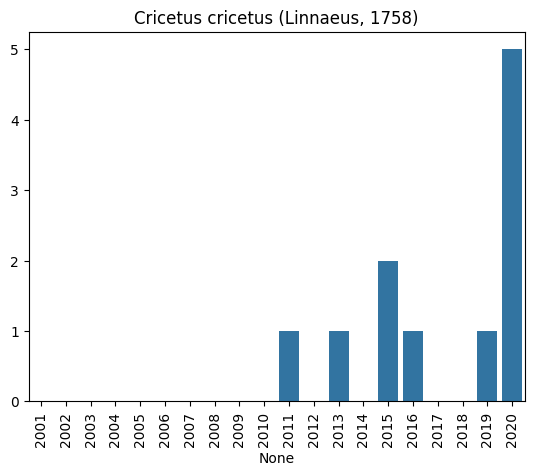

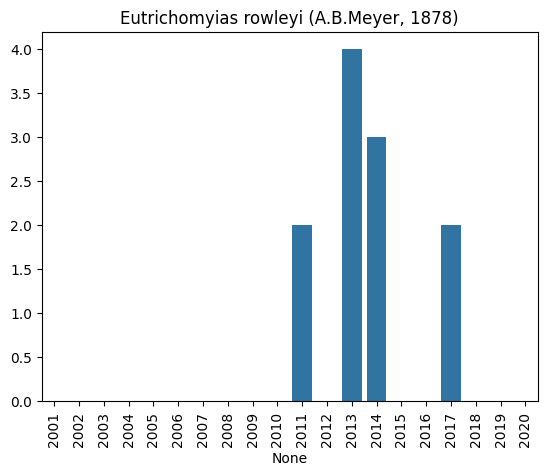

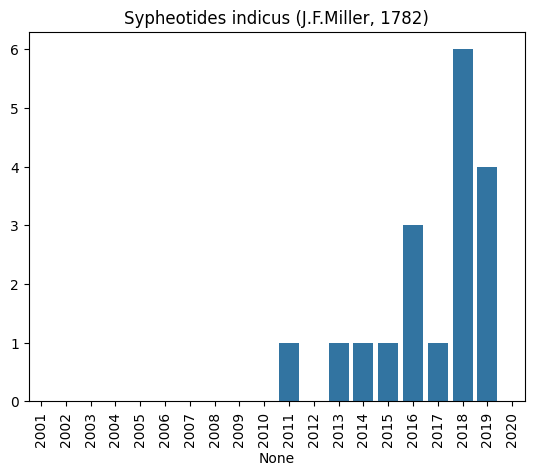

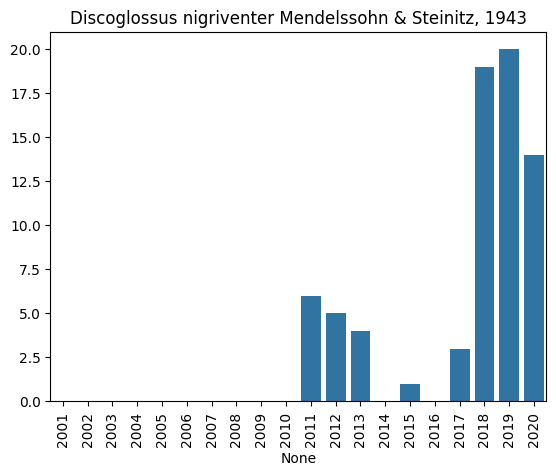

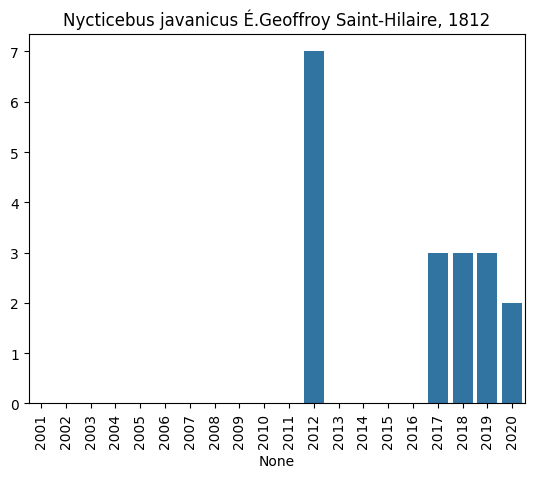

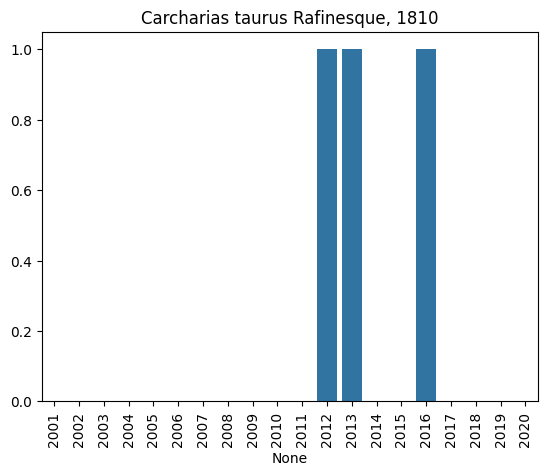

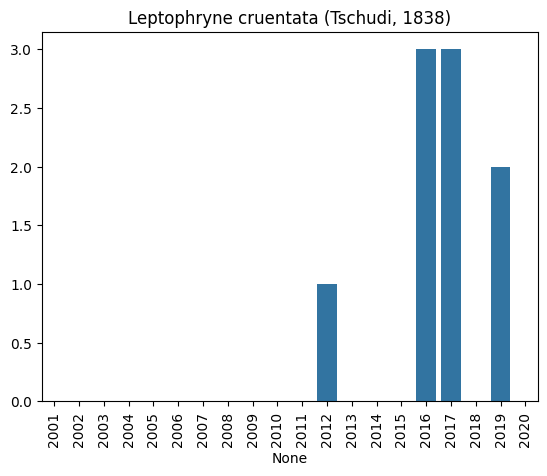

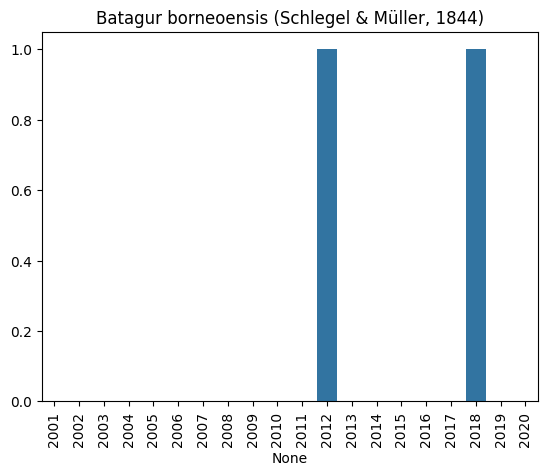

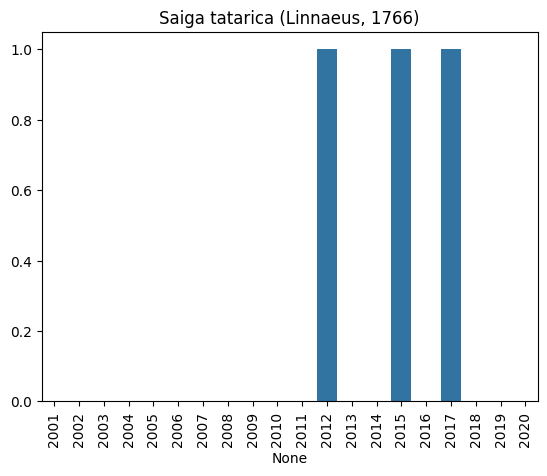

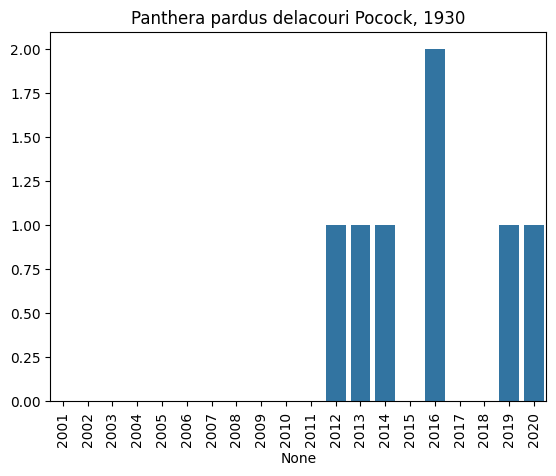

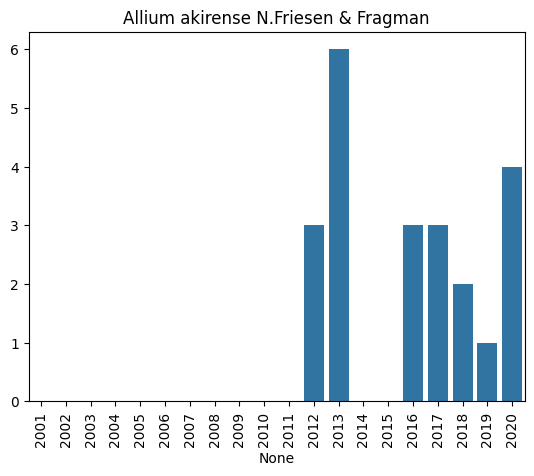

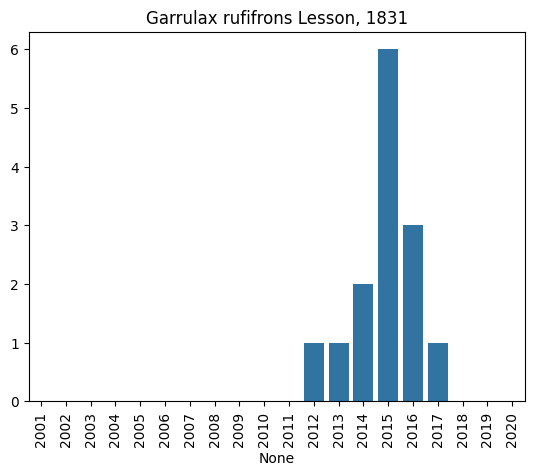

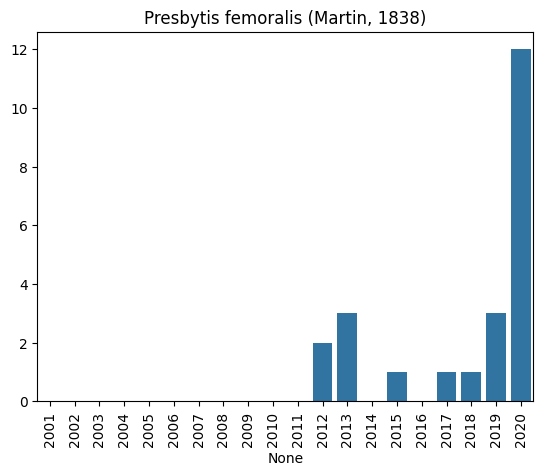

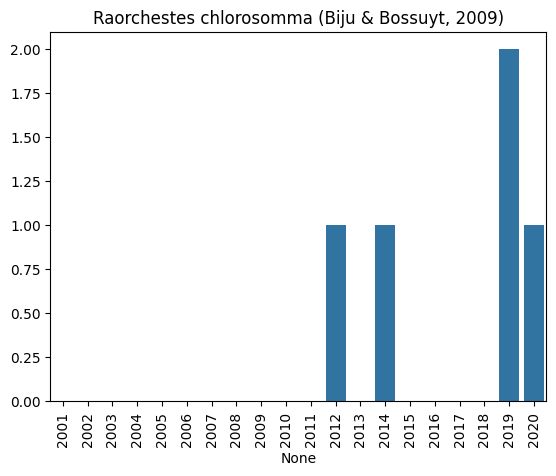

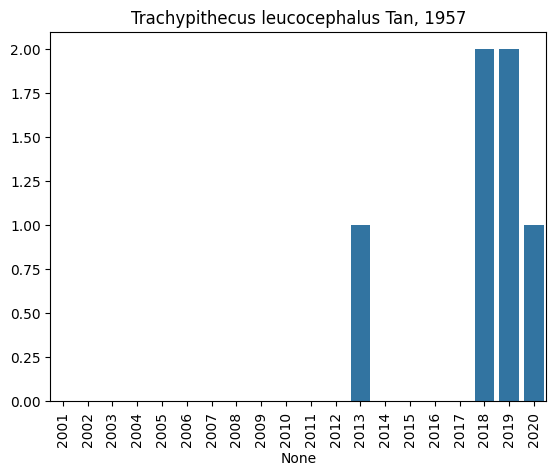

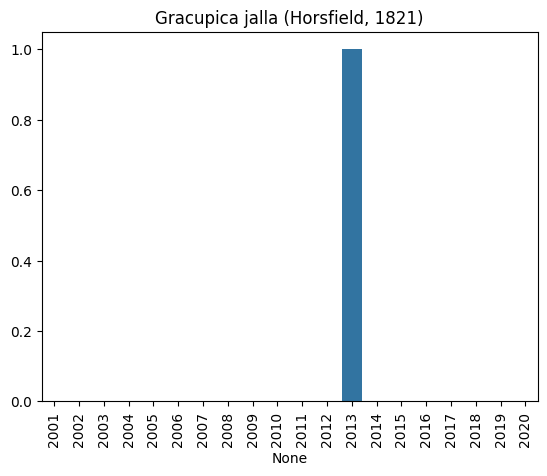

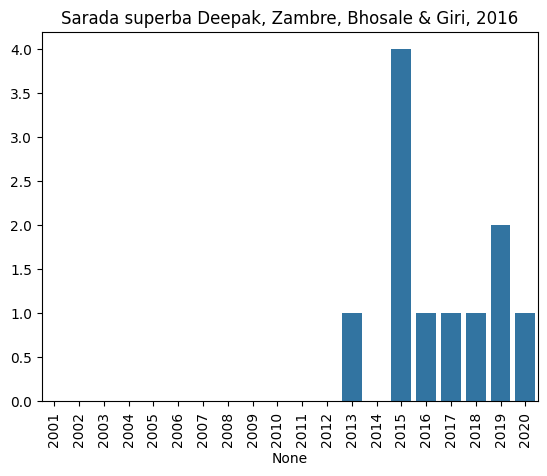

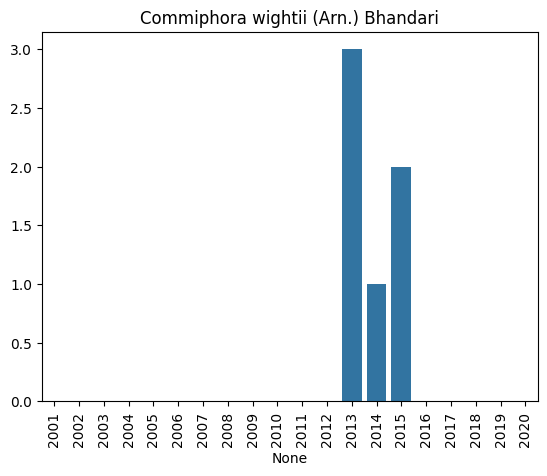

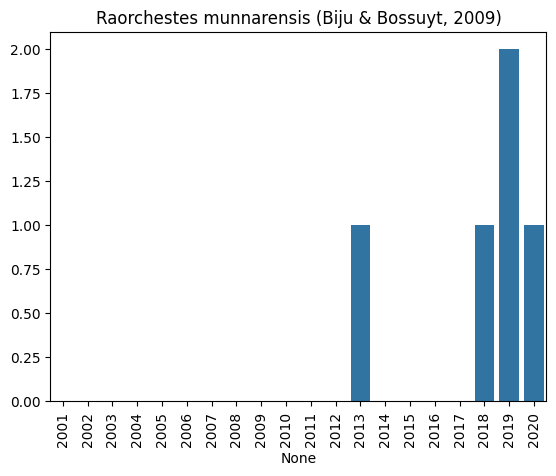

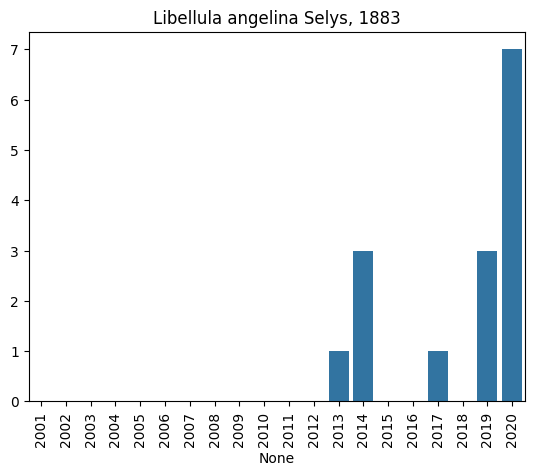

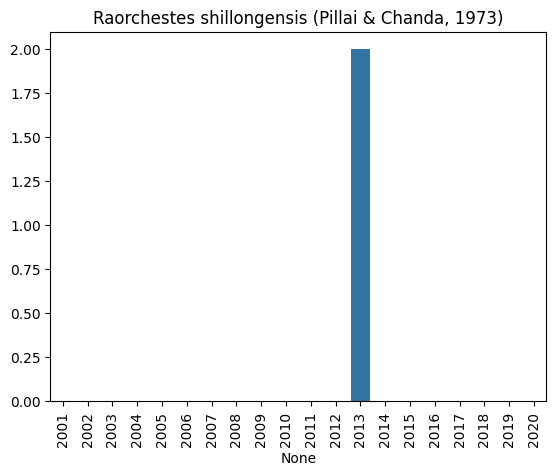

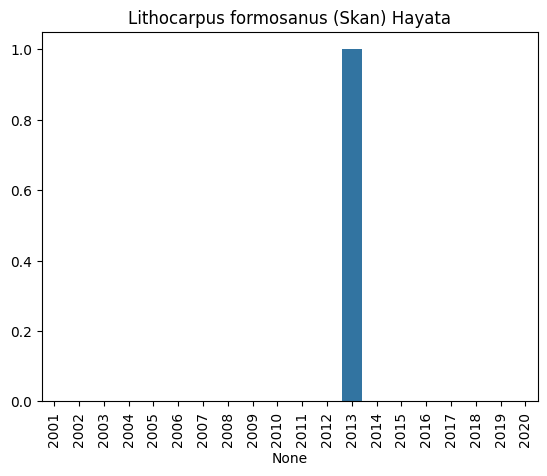

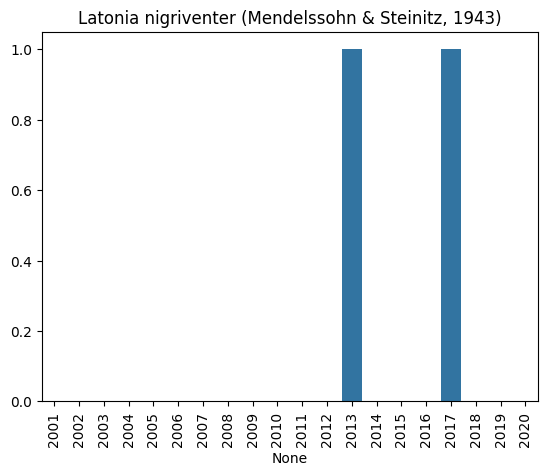

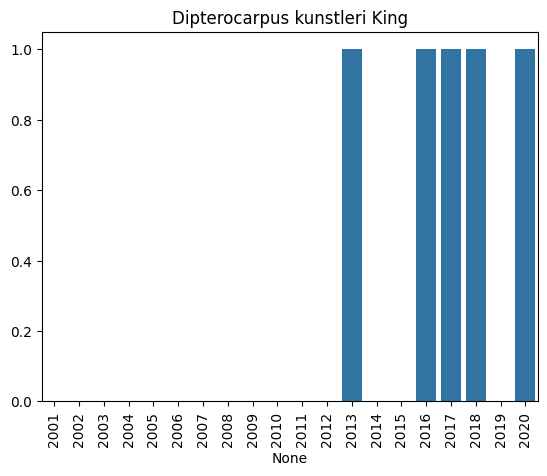

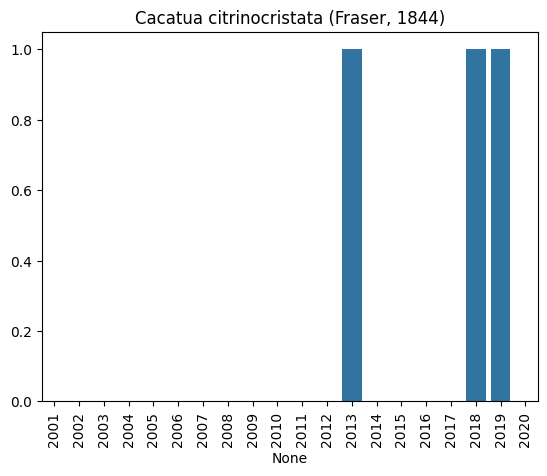

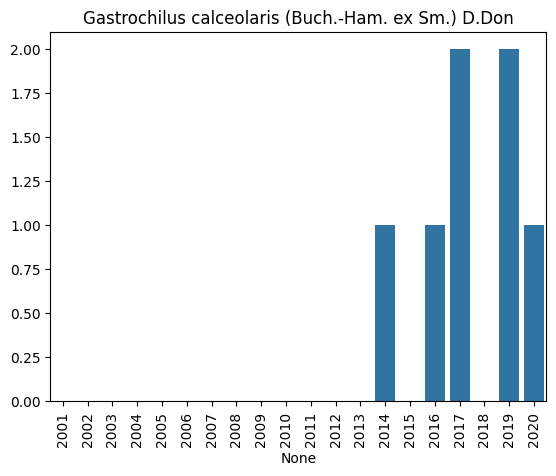

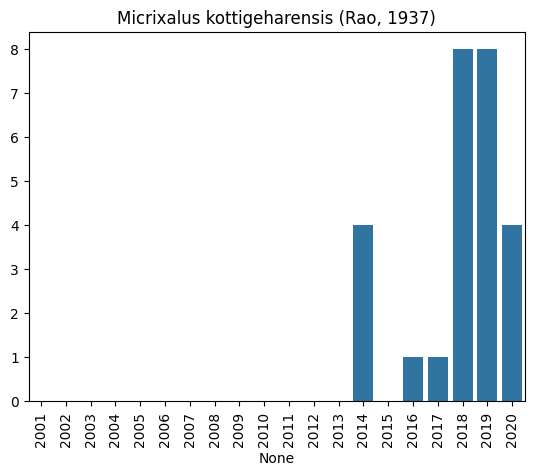

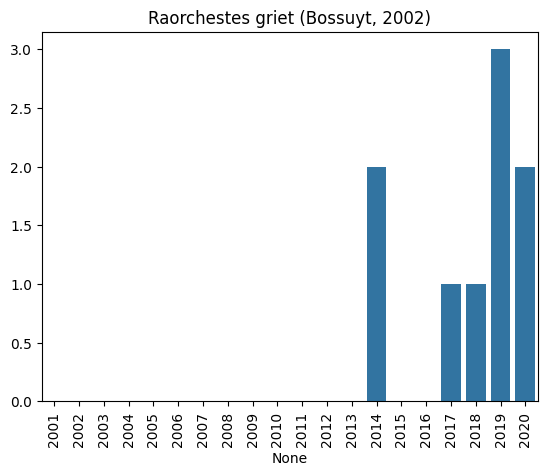

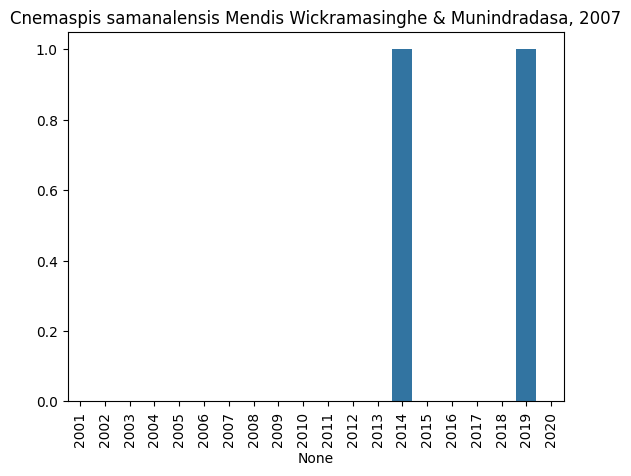

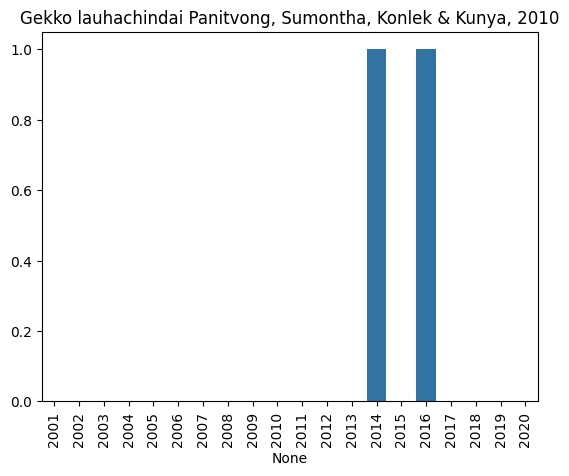

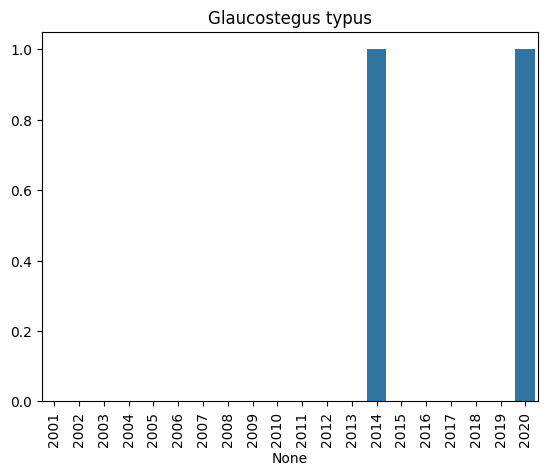

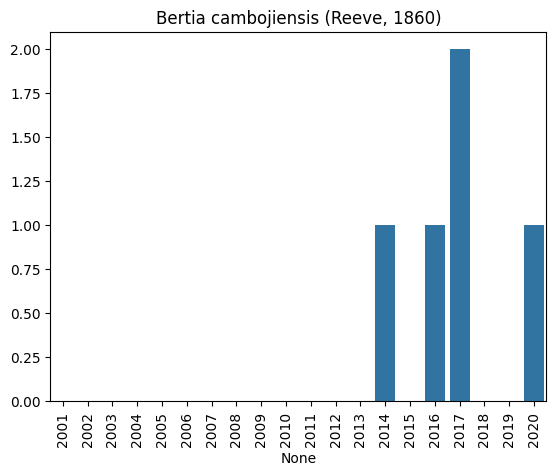

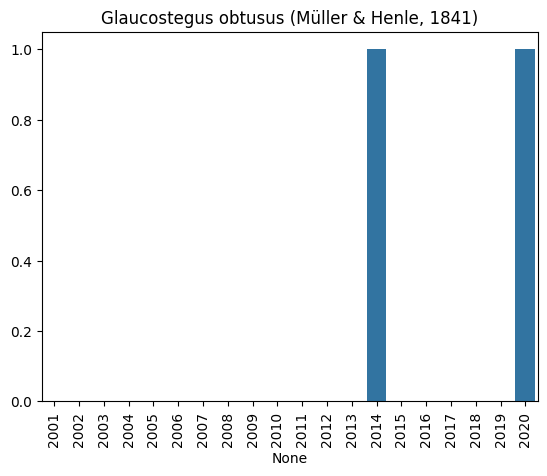

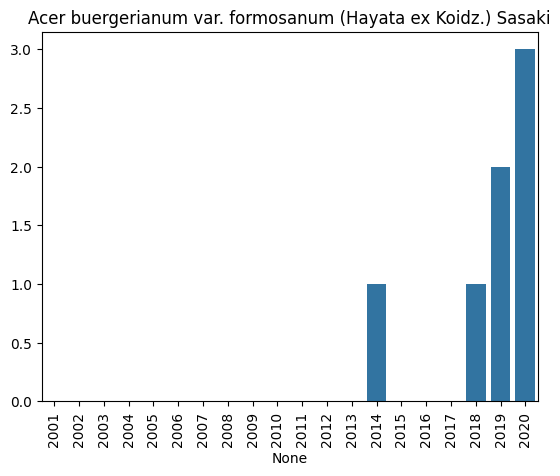

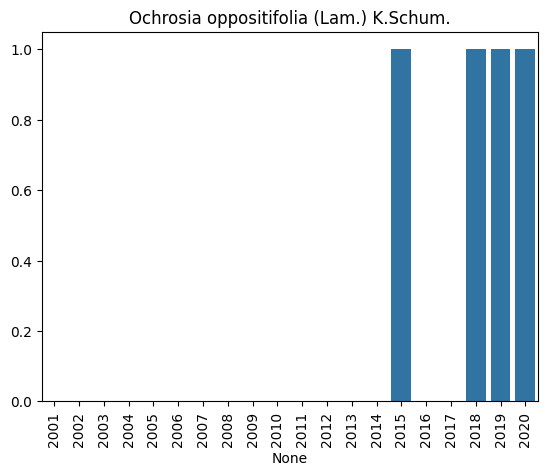

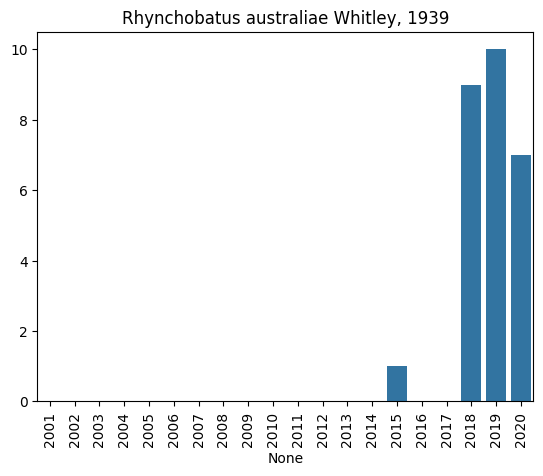

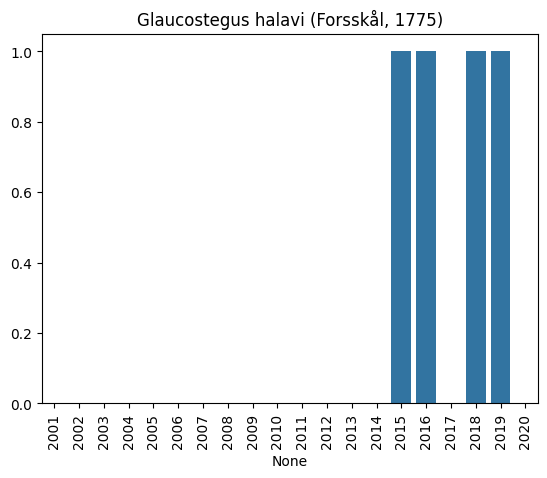

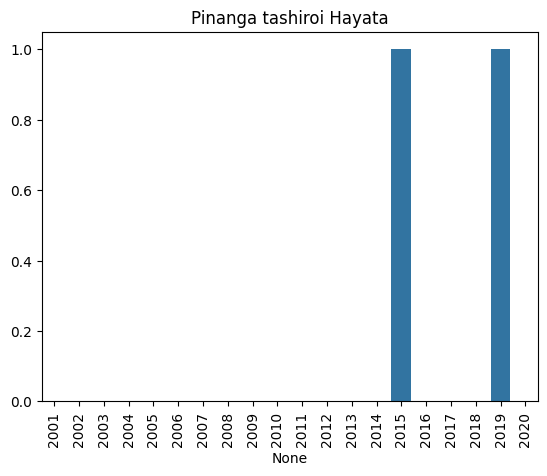

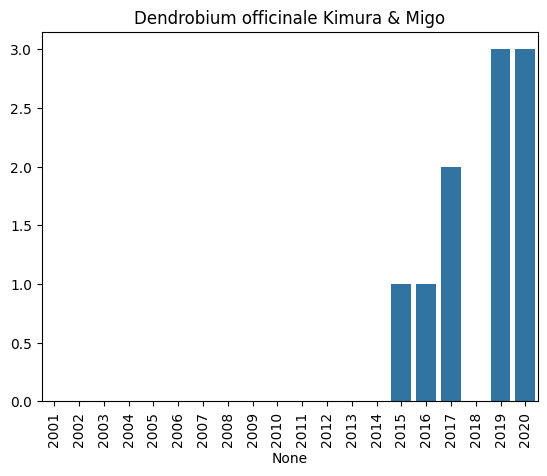

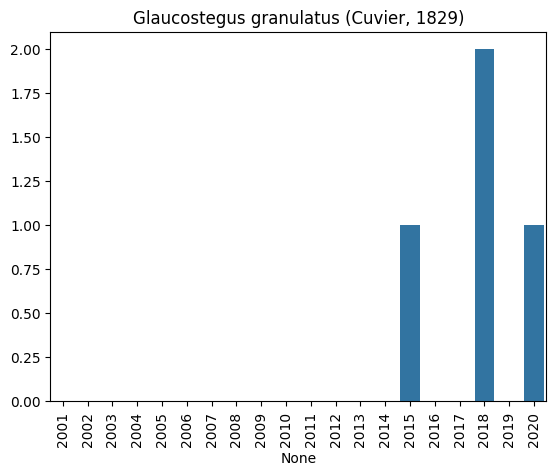

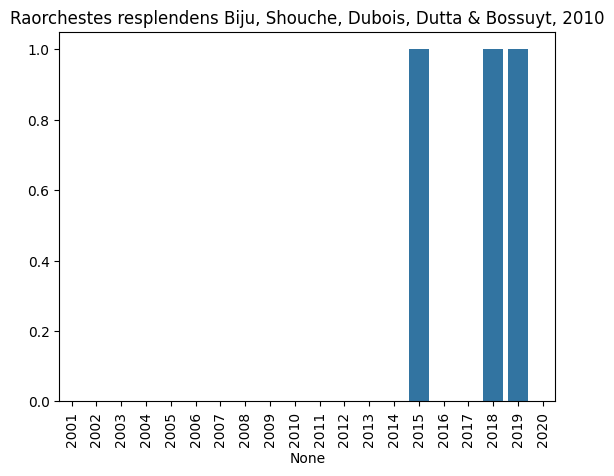

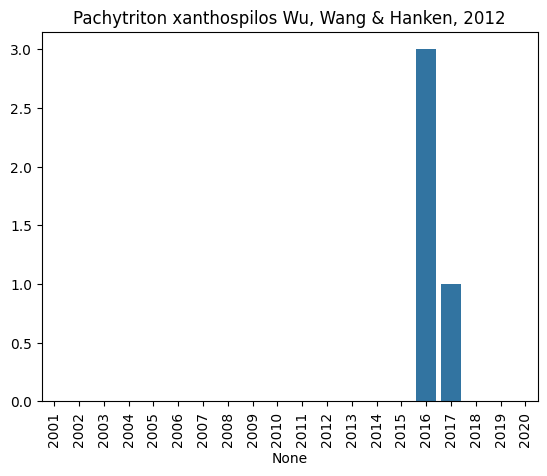

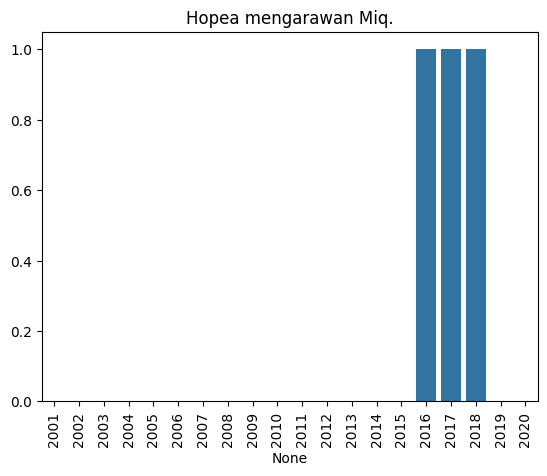

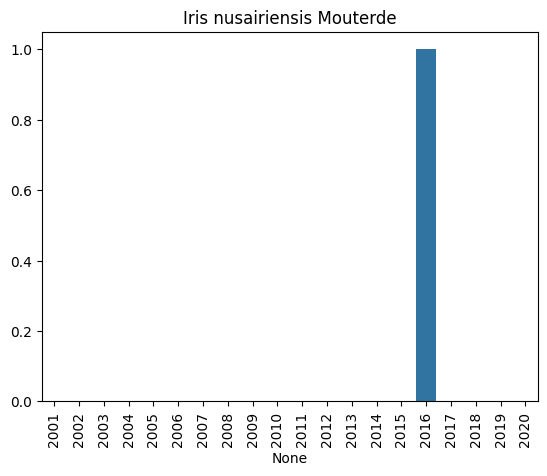

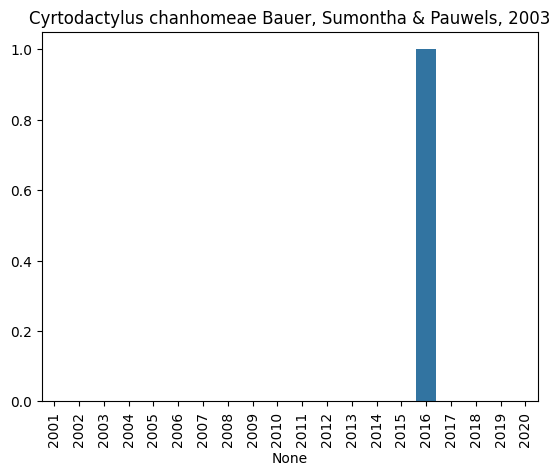

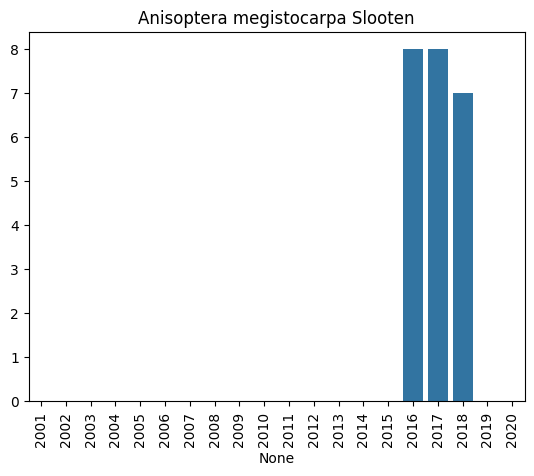

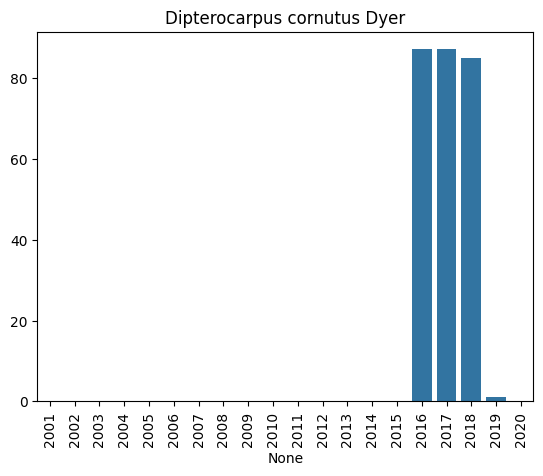

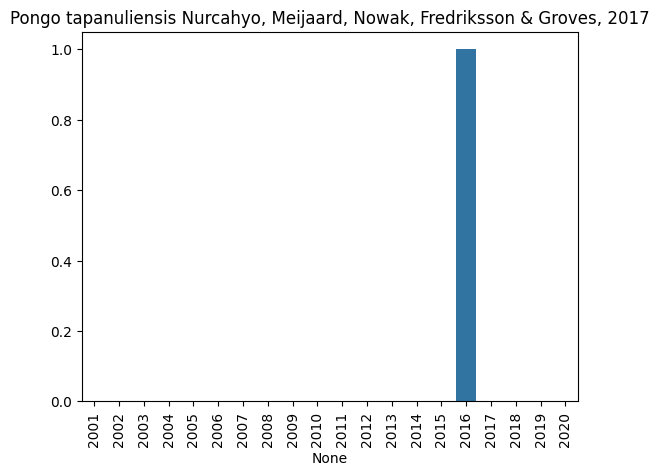

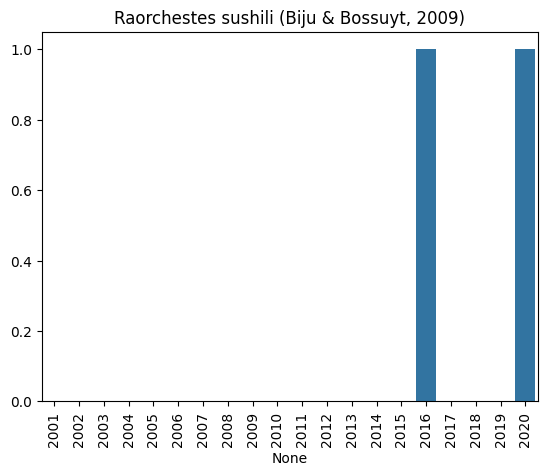

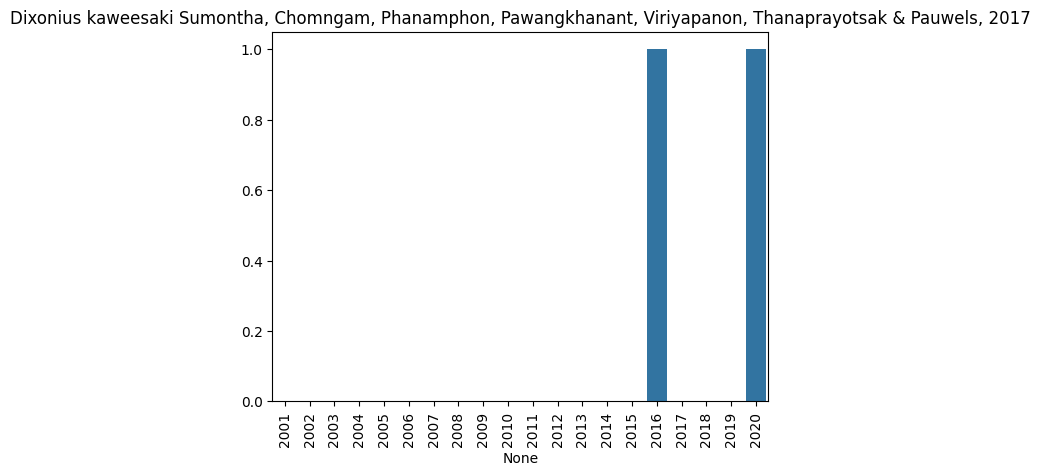

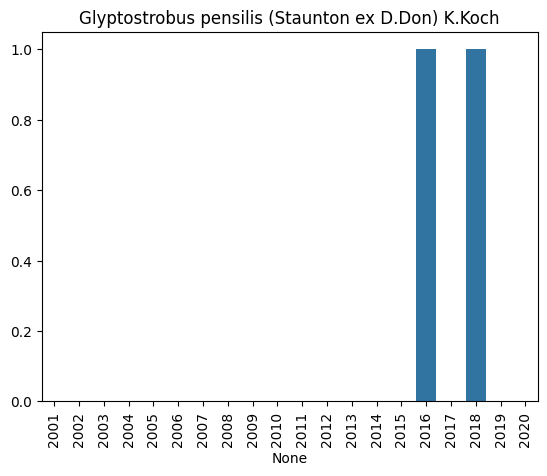

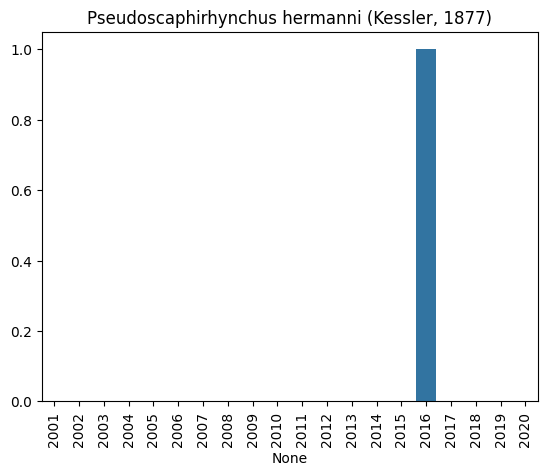

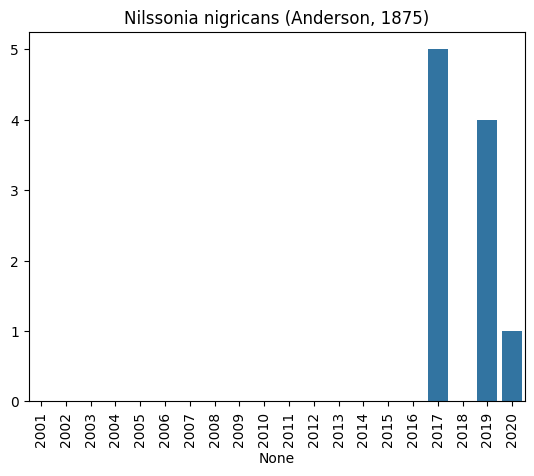

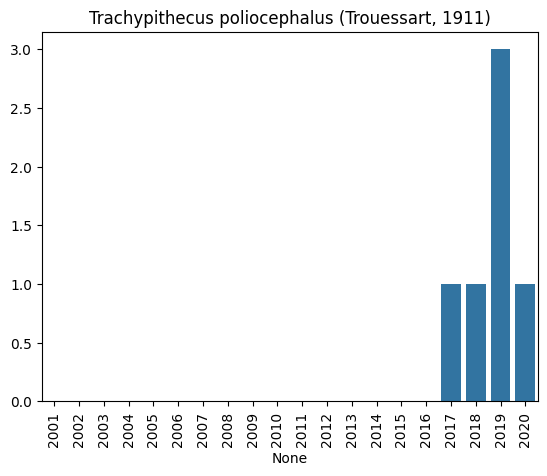

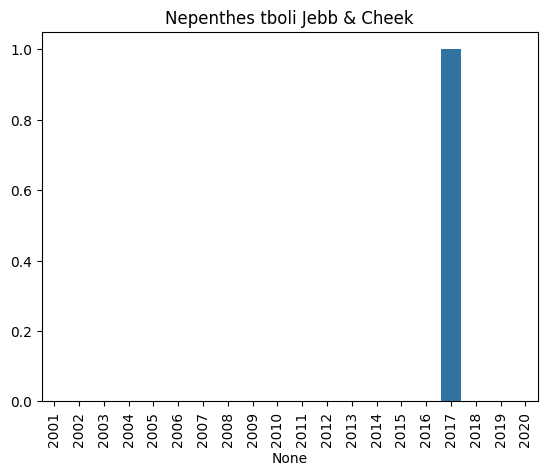

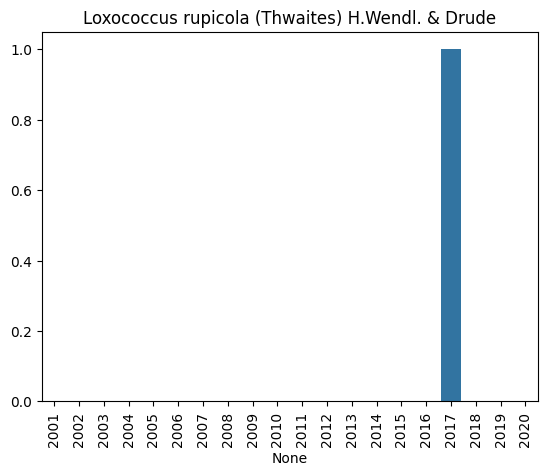

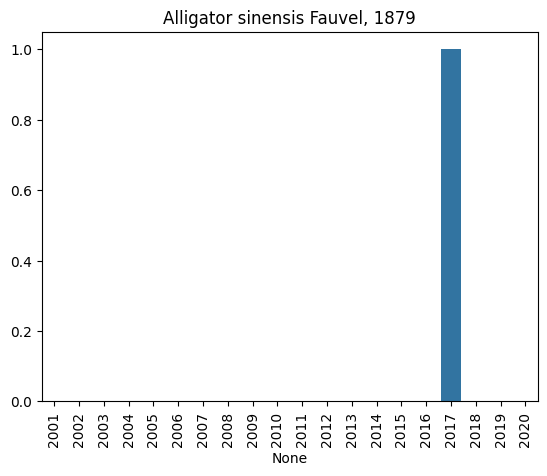

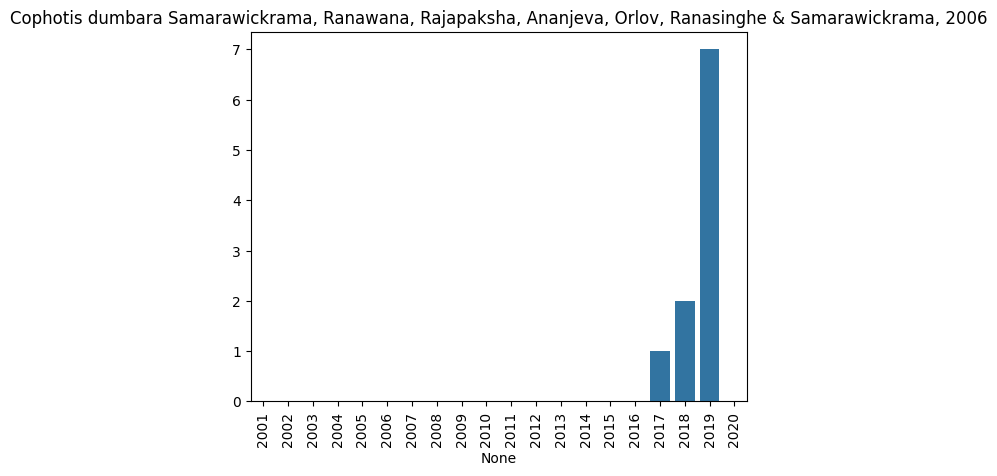

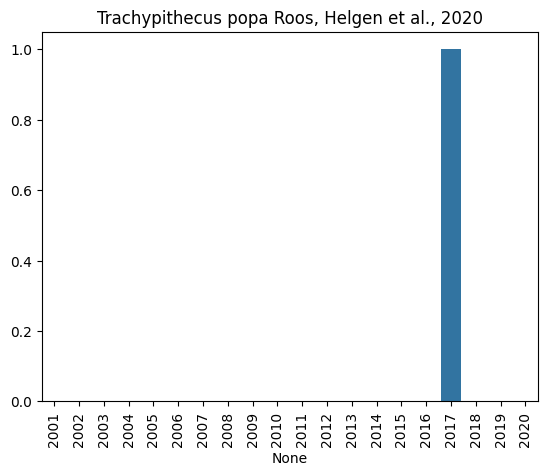

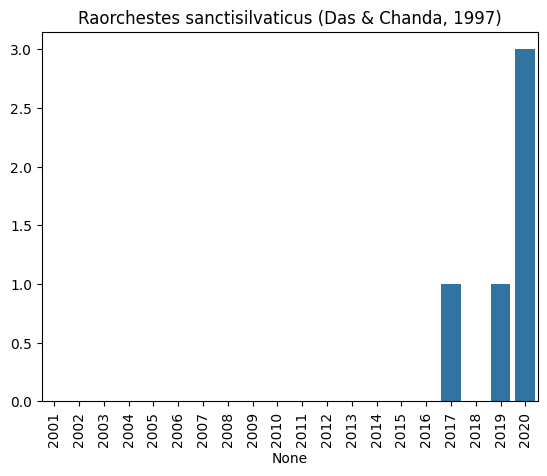

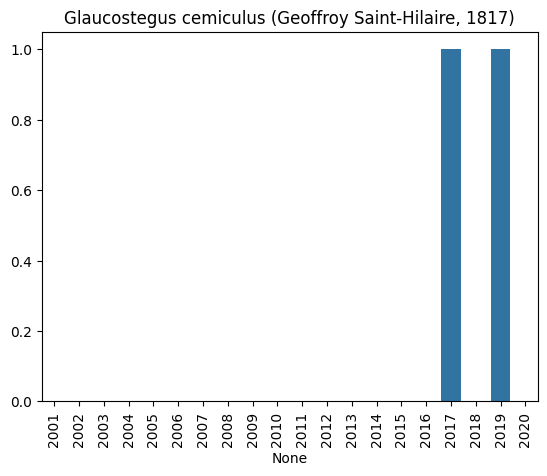

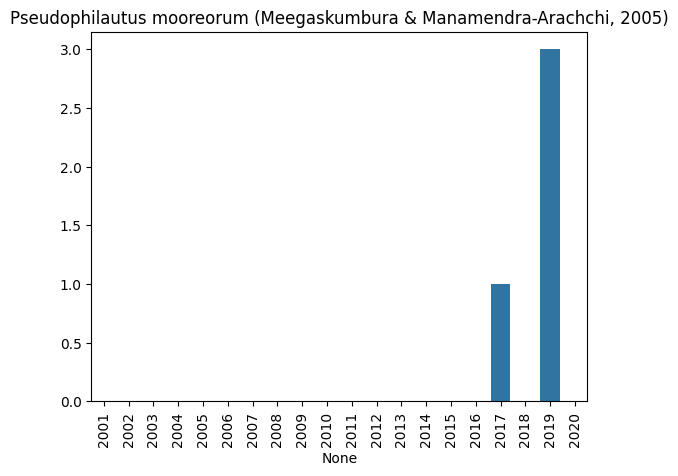

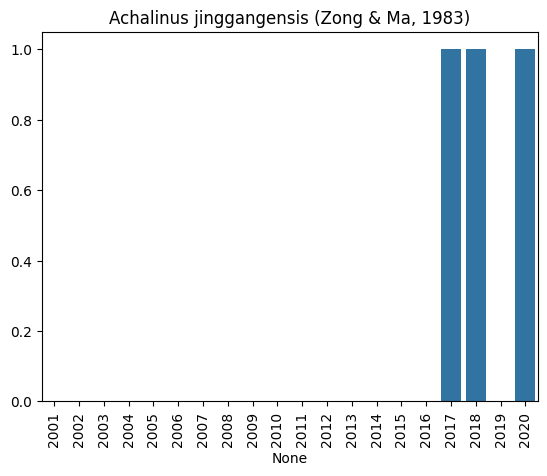

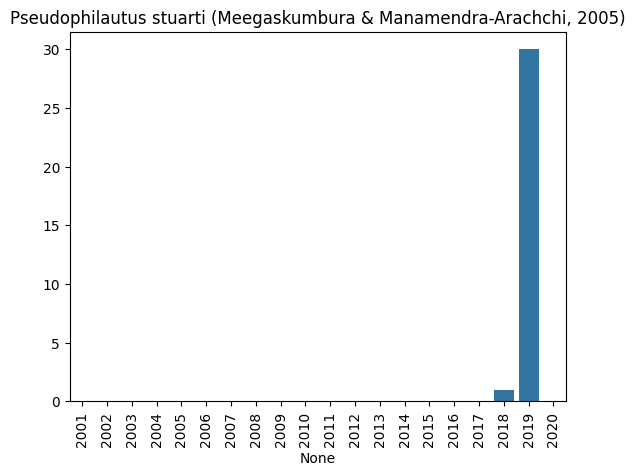

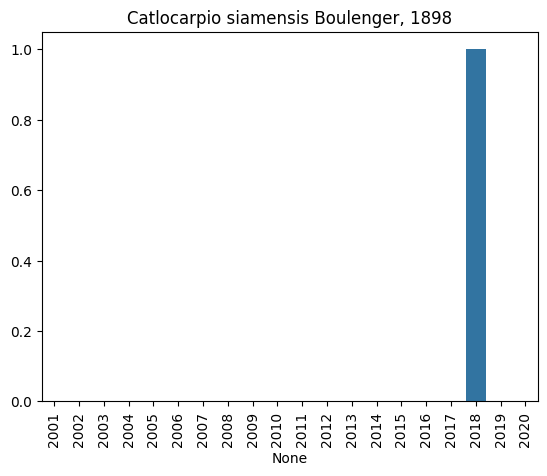

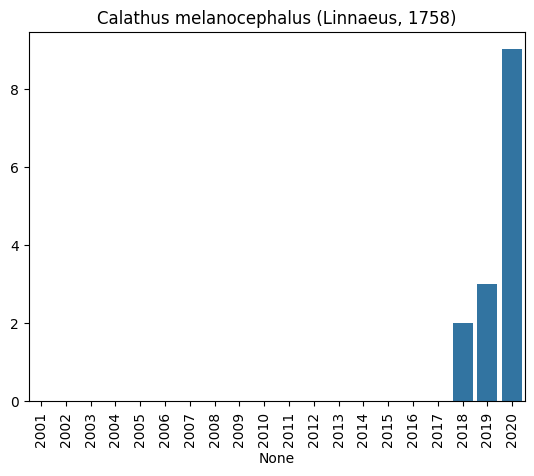

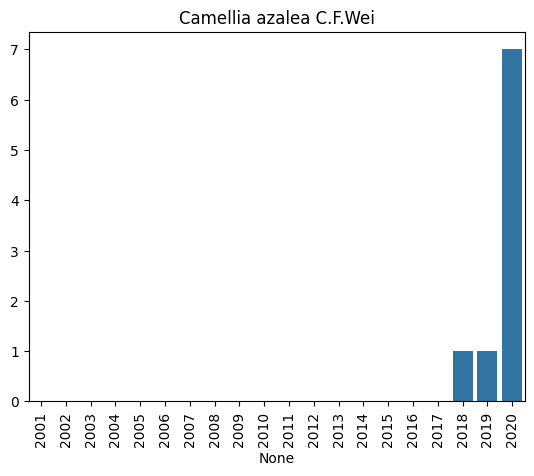

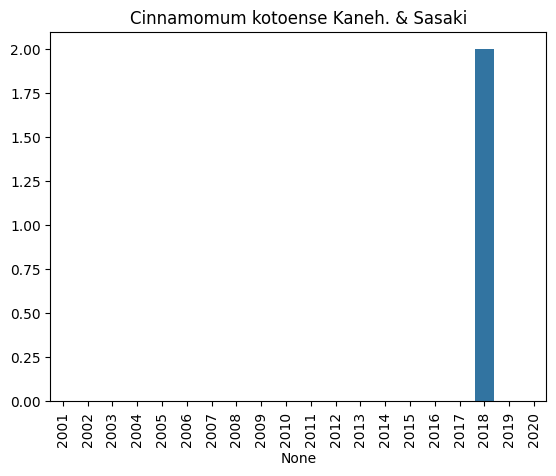

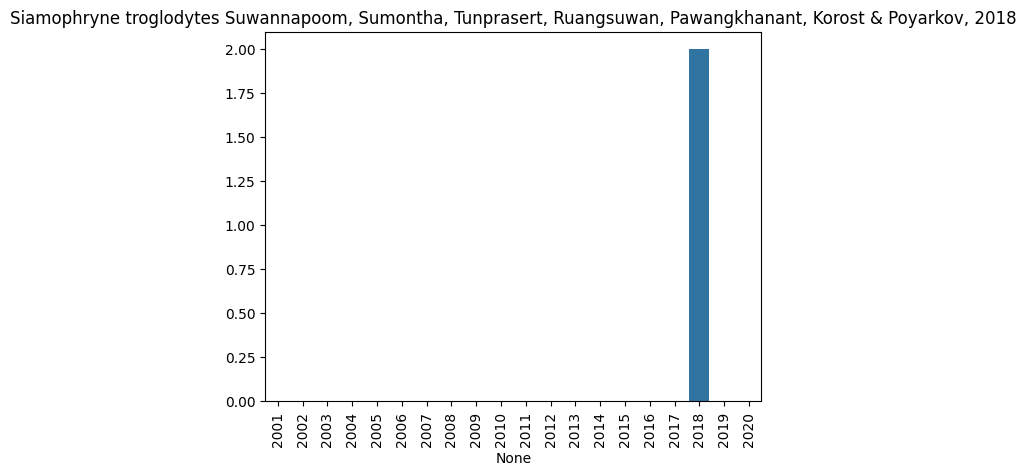

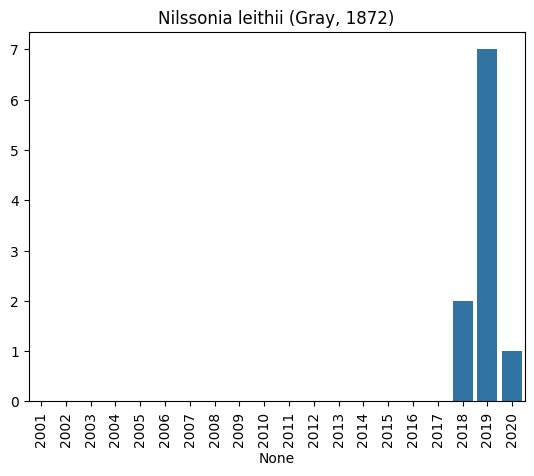

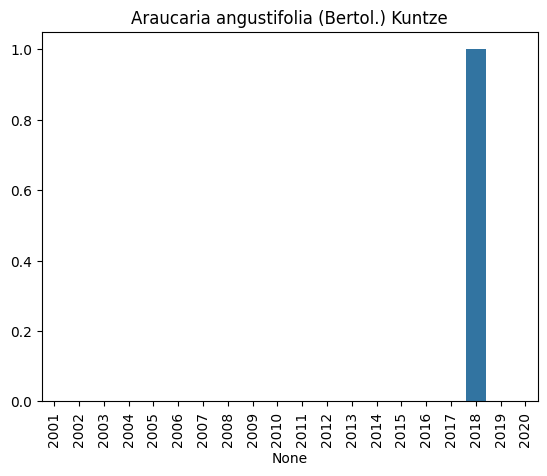

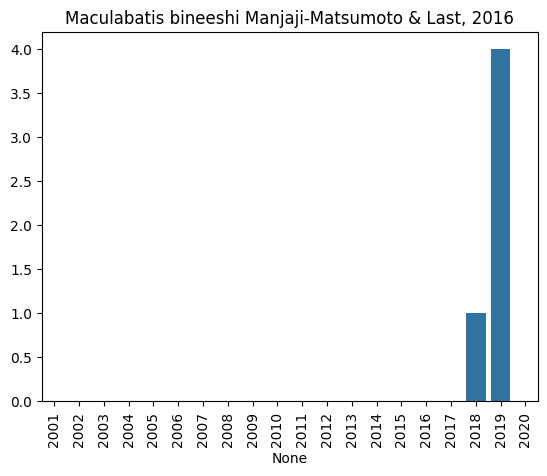

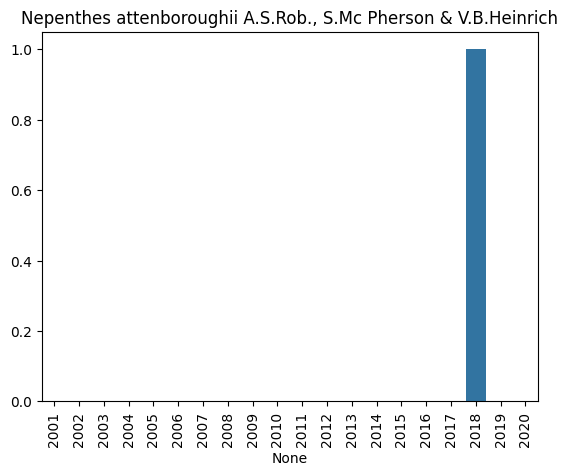

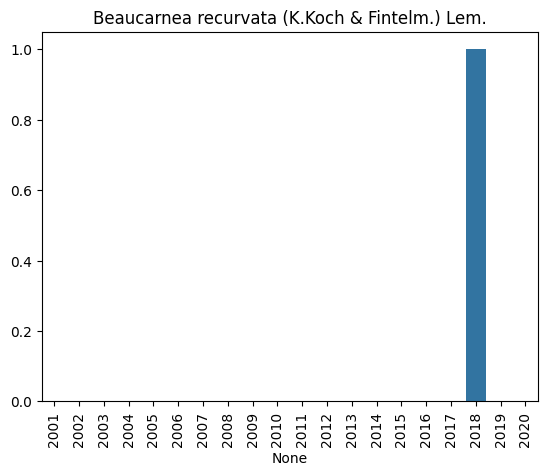

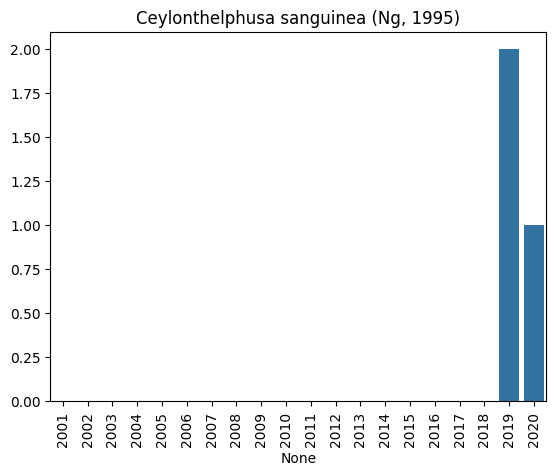

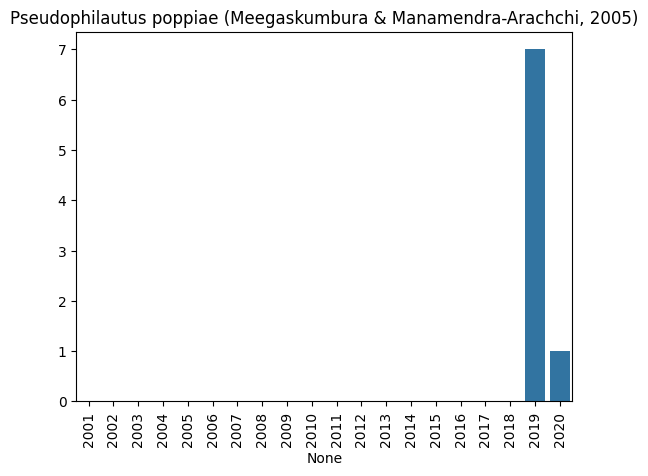

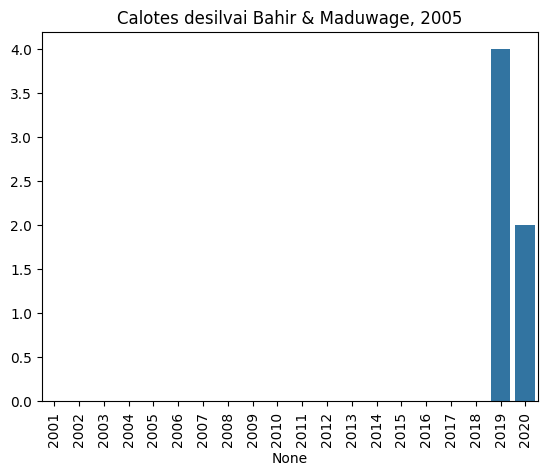

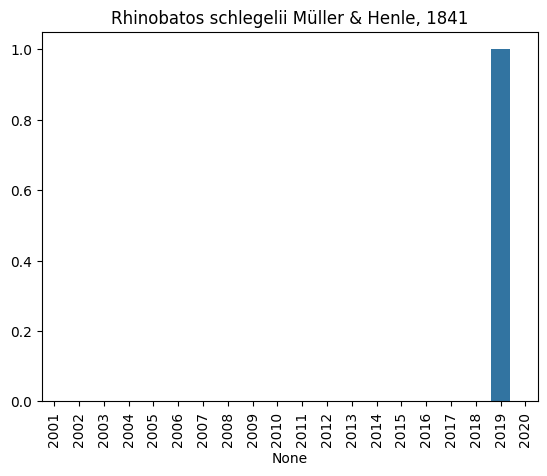

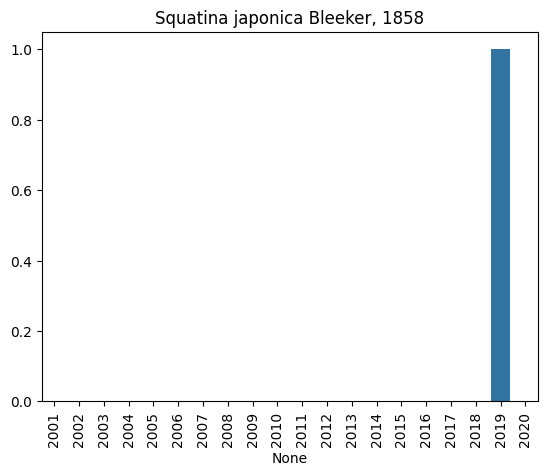

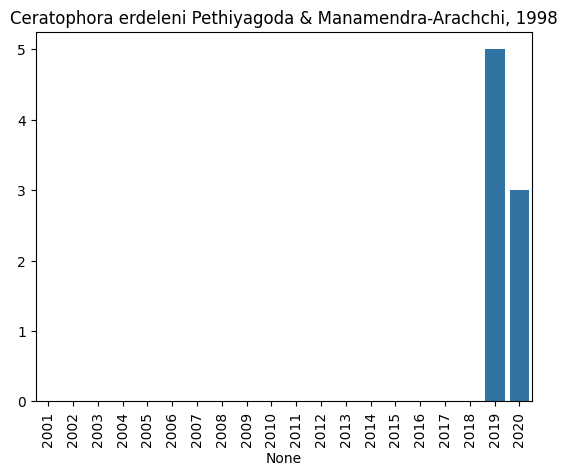

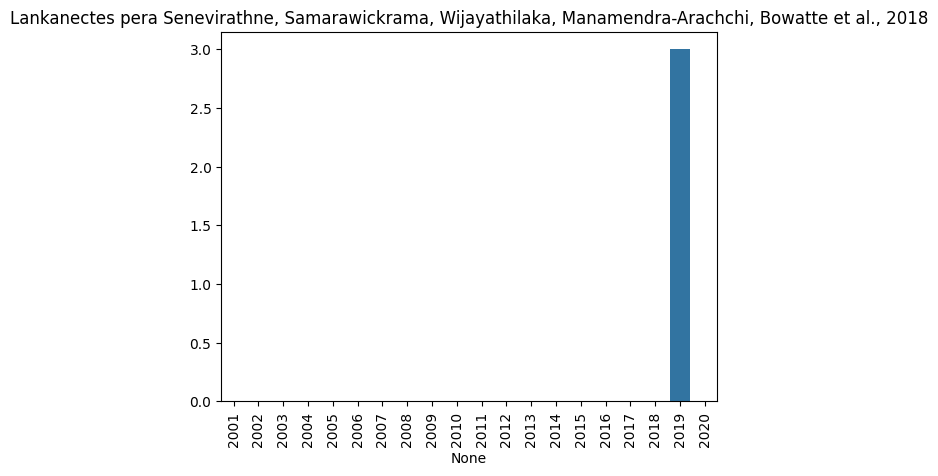

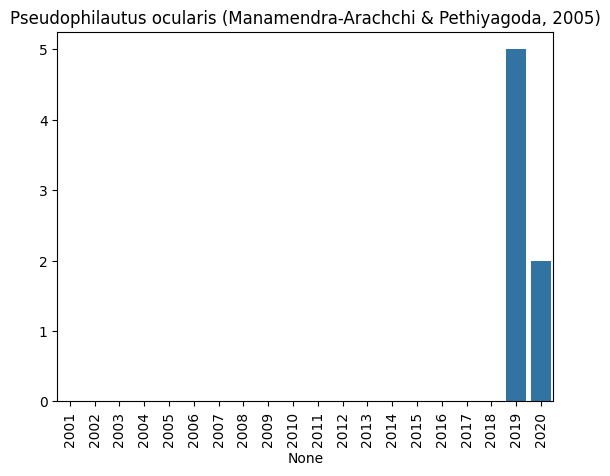

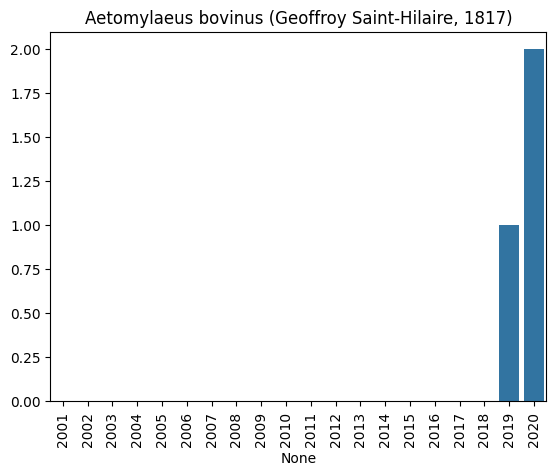

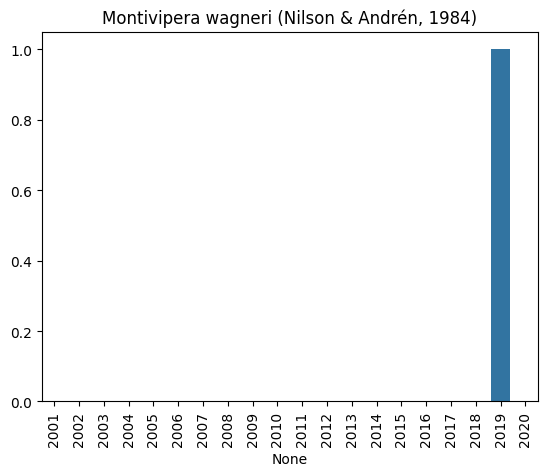

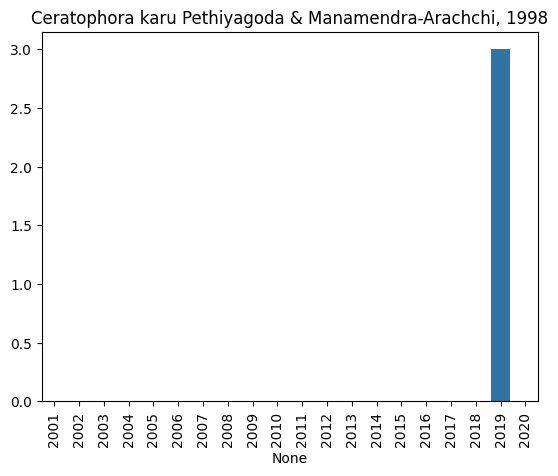

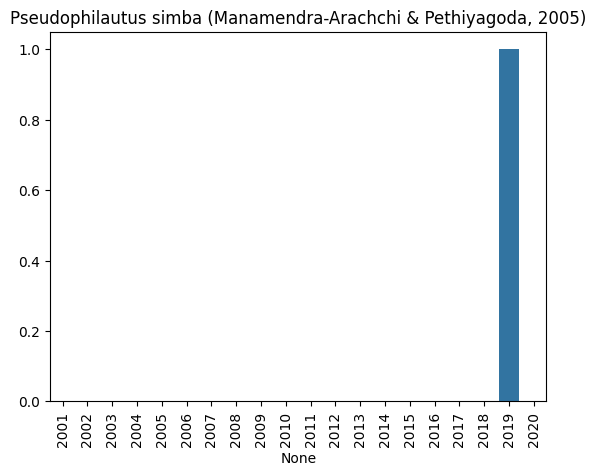

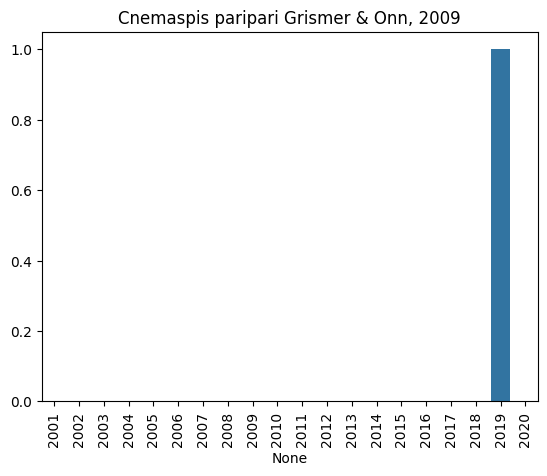

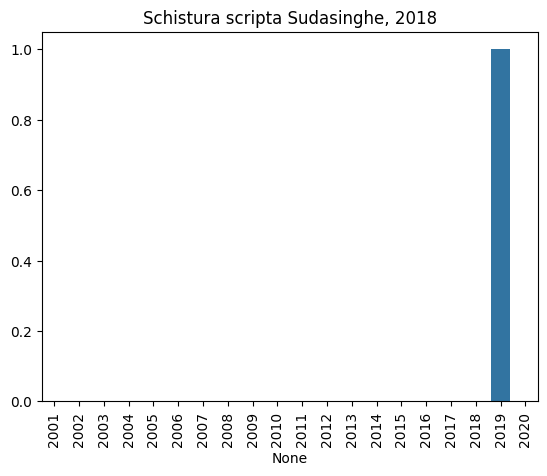

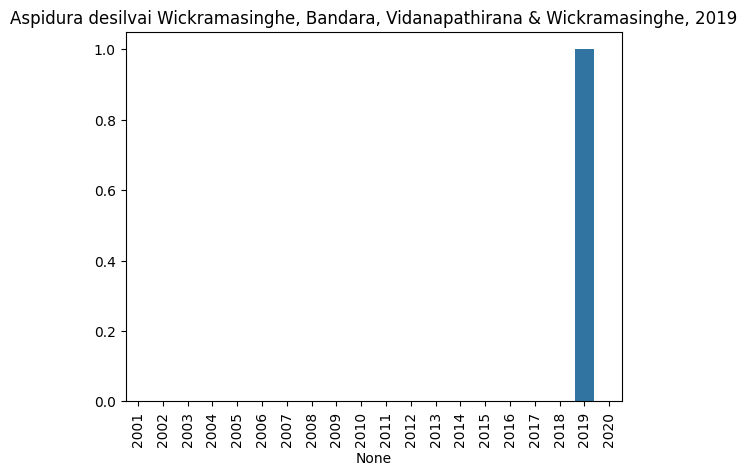

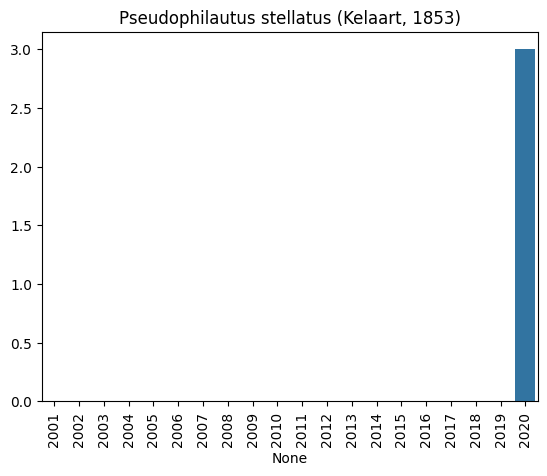

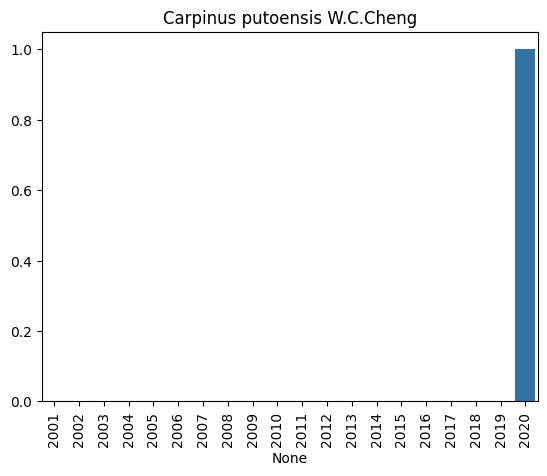

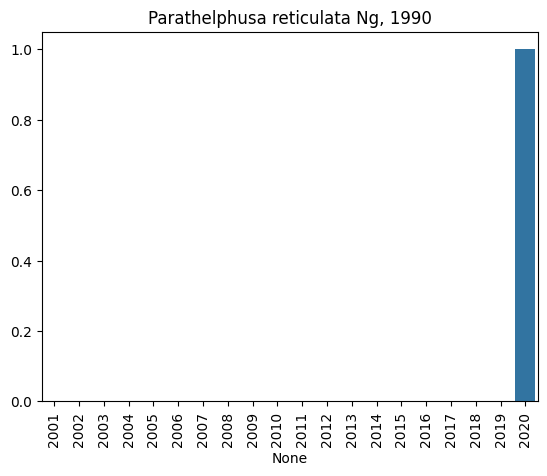

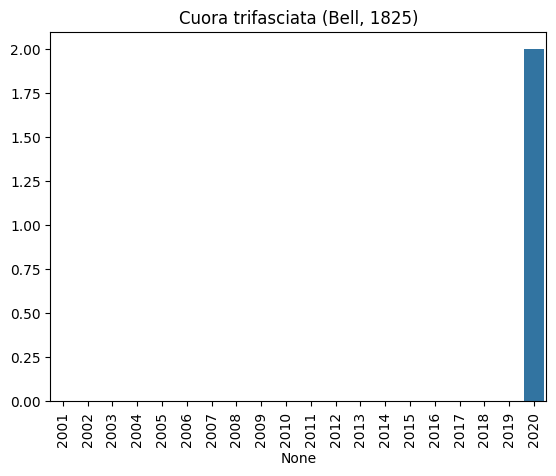

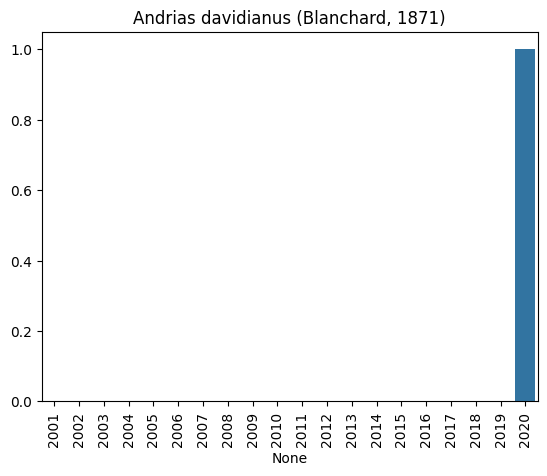

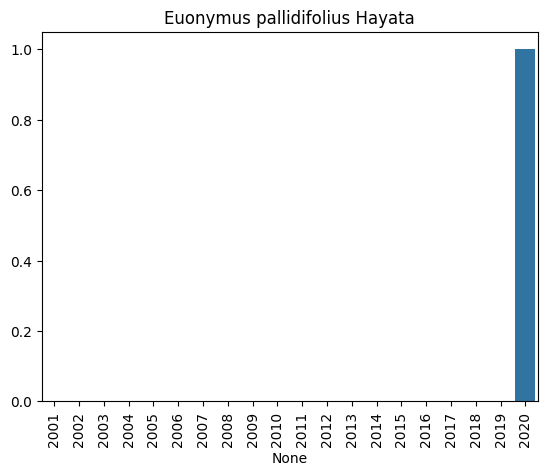

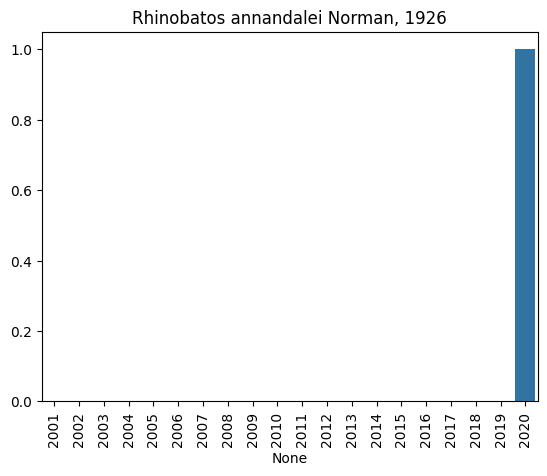

In [7]:
#Each graph represents the number of occurrence of the species in each year from 2000 to 2020.
num_row = len(final_df)
print("There are ", num_row," rows.")

for i in range(0,189):
  row = final_df.iloc[i, -20:]
  sns.barplot(x=row.index, y=row.values)
  plt.xticks(rotation=90)
  plt.title(final_df.iloc[i, -20:].name)
  plt.show()
